In [1]:
# Notebook magic: auto-reload edited .py modules without restarting the kernel.
%load_ext autoreload
%autoreload 2

# 1 Implement MLP for MNIST

### (1) MNIST Data Preparation (mnist.py)

Train dataset size: 48000
Val dataset size: 12000
Test dataset size: 10000


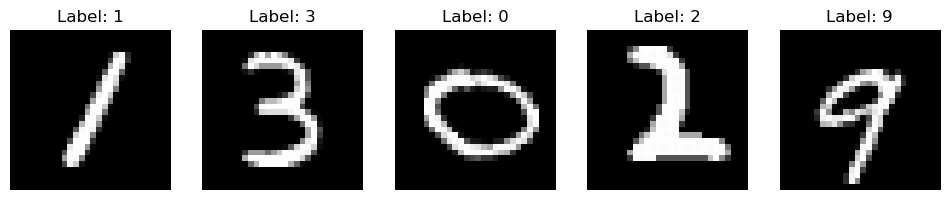

In [2]:
import matplotlib.pyplot as plt
import torch

from mnist import get_loaders  

# Get train/validation/test dataloaders
train_loader, val_loader, test_loader = get_loaders(batch_size=128)

# Print dataset sizes
print("Train dataset size:", len(train_loader.dataset))
print("Val dataset size:", len(val_loader.dataset))
print("Test dataset size:", len(test_loader.dataset))

# Visualize the first 5 samples from the training set
images, labels = next(iter(train_loader))
fig, axes = plt.subplots(1, 5, figsize=(12, 3))

for i in range(5):
    axes[i].imshow(images[i].squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis("off")

plt.show()

### (2) Implement a Simple Two-Layer MLP (twolayermlp.py)

In [3]:
from twolayermlp import TwoLayerMLP

# instantiate the model
model = TwoLayerMLP()

# print the architecture
print(model)


TwoLayerMLP(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=1024, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1024, out_features=1024, bias=True)
    (4): ReLU()
    (5): Linear(in_features=1024, out_features=10, bias=True)
  )
)


### (3) Train the MLP on MNIST (mnist_mlp.py)

In [4]:
import torch
import os
import mnist_mlp
from checkpoint import Checkpointer

# --- device ---
if torch.cuda.is_available():
    current = torch.cuda.current_device()
    print(f"Current GPU [{current}]:", torch.cuda.get_device_name(current))
else:
    print("No CUDA GPU detected.")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

optimizers = ["sgd"]

# --- hyperparameters ---
lr =  1e-3       # according to the homework requirement
epochs =   5     # according to the homework requirement
batch_size =  128   # according to the homework requirement
seed = 42

for optimizer in optimizers:
    # --- checkpoint ---
    save_dir = "checkpoints_MLP"
    os.makedirs(save_dir, exist_ok=True)

    ckpt_path = os.path.join(save_dir, f"mnist_mlp_{optimizer}.pth")
    ckpt = Checkpointer(ckpt_path, device)

    mnist_mlp.main(ckpt, device, seed, lr, epochs, batch_size, optimizer_name=optimizer)

Current GPU [0]: NVIDIA GeForce RTX 4090 Laptop GPU
[resume] Loaded checkpoints_MLP\mnist_mlp_sgd.pth: last finished epoch = 5
-------------------------------------------------------------------
[sgd] Test: loss=2.1493, acc=63.68% | time: 0.58s
Results summary saved to checkpoints_MLP\mnist_mlp_sgd_summary.txt


# 2.1 Implement CNN for CIFAR-10

### (1) CIFAR-10 Data Preparation (cifar10.py)

Files already downloaded and verified
Train dataset size: 40000
Val dataset size: 10000
Test dataset size: 10000


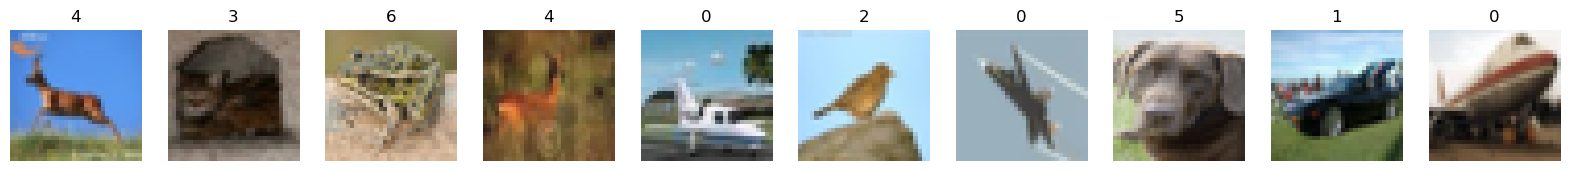

In [5]:
import matplotlib.pyplot as plt
import torch

from cifar10 import get_loaders  

# Get train/validation/test dataloaders
train_loader, val_loader, test_loader = get_loaders(batch_size=128)

# Print dataset sizes
print("Train dataset size:", len(train_loader.dataset))
print("Val dataset size:", len(val_loader.dataset))
print("Test dataset size:", len(test_loader.dataset))

# Visualize the first 10 samples from the training set
images, labels = next(iter(train_loader))
fig, axes = plt.subplots(1, 10, figsize=(20, 3))  # 1 row, 10 columns

for i in range(10):
    img = images[i].permute(1, 2, 0)  # convert from [C, H, W] to [H, W, C]
    axes[i].imshow(img)
    axes[i].set_title(f"{labels[i].item()}")
    axes[i].axis("off")

plt.show()

### (2) Implement a CNN (threelayerconv.py)

In [6]:
from threelayerconv import ThreeLayerConv

# instantiate the model
model = ThreeLayerConv()

# print the architecture
print(model)

ThreeLayerConv(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1152, out_features=1000, bias=True)
    (2): ReLU()
    (3): Linear(in_features=1000, out_features=10, bias=True)
  )
)


### (3) Train the CNN on CIAFR-10 (cifar10_cnn.py)

In [7]:
import torch
import os
import cifar10_cnn
from checkpoint import Checkpointer

# --- device ---
if torch.cuda.is_available():
    current = torch.cuda.current_device()
    print(f"Current GPU [{current}]:", torch.cuda.get_device_name(current))
else:
    print("No CUDA GPU detected.")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

optimizers = ["sgd"]

# --- hyperparameters ---
lr =  1e-3       # according to the homework requirement
epochs =   5     # according to the homework requirement
batch_size =  128   # according to the homework requirement
seed = 42

for optimizer in optimizers:
    # --- checkpoint ---
    save_dir = "checkpoints_CNN"
    os.makedirs(save_dir, exist_ok=True)

    ckpt_path = os.path.join(save_dir, f"cifar10_cnn_{optimizer}.pth")
    ckpt = Checkpointer(ckpt_path, device)
    
    cifar10_cnn.main(ckpt, device, seed, lr, epochs, batch_size, optimizer_name=optimizer)

Current GPU [0]: NVIDIA GeForce RTX 4090 Laptop GPU
Files already downloaded and verified
[resume] Loaded checkpoints_CNN\cifar10_cnn_sgd.pth: last finished epoch = 5
-------------------------------------------------------------------
[sgd] Test: loss=2.2978, acc=12.91% | time: 0.80s
Results summary saved to checkpoints_CNN\cifar10_cnn_sgd_summary.txt


# 2.2 Implement VGG-13 for CIFAR-10

### (1) Train the VGG-13 on CIAFR-10 (cifar10_vgg13.py)

In [8]:
import torch
import os
import cifar10_vgg13
from checkpoint import Checkpointer

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# --- device ---
if torch.cuda.is_available():
    current = torch.cuda.current_device()
    print(f"Current GPU [{current}]:", torch.cuda.get_device_name(current))
else:
    print("No CUDA GPU detected.")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

optimizers = ["sgd"]

# --- hyperparameters ---
lr =  1e-3       # according to the homework requirement
epochs =   5     # according to the homework requirement
batch_size =  128   # according to the homework requirement
seed = 42

for optimizer in optimizers:
    # --- checkpoint ---
    save_dir = "checkpoints_VGG13_v2"
    os.makedirs(save_dir, exist_ok=True)

    ckpt_path = os.path.join(save_dir, f"cifar10_vgg13_{optimizer}.pth")
    ckpt = Checkpointer(ckpt_path, device)
    
    cifar10_vgg13.main(ckpt, device, seed, lr, epochs, batch_size, optimizer_name=optimizer)

Current GPU [0]: NVIDIA GeForce RTX 4090 Laptop GPU
Files already downloaded and verified
[resume] No checkpoint at checkpoints_VGG13_v2\cifar10_vgg13_sgd.pth; starting from scratch.
-------------------------------------------------------------------
[sgd] Epoch 1/5 | Train: loss=2.3029, acc=10.15% | Val: loss=2.3024, acc=10.06% | time: 6.00s
[sgd] Epoch 2/5 | Train: loss=2.3021, acc=10.39% | Val: loss=2.3019, acc=10.06% | time: 5.54s
[sgd] Epoch 3/5 | Train: loss=2.3018, acc=10.91% | Val: loss=2.3014, acc=10.43% | time: 5.52s
[sgd] Epoch 4/5 | Train: loss=2.3012, acc=11.61% | Val: loss=2.3009, acc=12.03% | time: 5.48s
[sgd] Epoch 5/5 | Train: loss=2.3006, acc=12.20% | Val: loss=2.3003, acc=13.94% | time: 5.65s
[sgd] Test: loss=2.3002, acc=13.84% | time: 0.71s
Results summary saved to checkpoints_VGG13_v2\cifar10_vgg13_sgd_summary.txt


# Comparing Adaptive Gradient and Momentum Methods in Deep Learning

### (1) Test on MNIST with MLP

In [9]:
# write your test code here
import torch
import os
from checkpoint import Checkpointer

from mnist_mlp import main
print("Success Import Model")

# Output
OUTPUT_DIR = "notebook_tests"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# GPU Test
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Checkpoint Test
ckpt_filename = f"notebook_test_MNIST_MLP.pth"
ckpt_path = os.path.join(OUTPUT_DIR, ckpt_filename)
ckpt = Checkpointer(ckpt_path, device)

print("CHECK END, START TEST ON MODEL")

main(
    ckpt=ckpt, 
    device=device, 
    seed = 42, 
    lr = 1e-3, 
    epochs = 5, 
    batch_size = 128, 
    optimizer_name= 'adam', 
    momentum = None
)

print("TEST END")

Success Import Model
Device: cuda
CHECK END, START TEST ON MODEL
[resume] Loaded notebook_tests\notebook_test_MNIST_MLP.pth: last finished epoch = 5
-------------------------------------------------------------------
[adam] Test: loss=0.0741, acc=97.79% | time: 0.47s
Results summary saved to notebook_tests\notebook_test_MNIST_MLP_summary.txt
TEST END


### (2) Test on CIFAR-10 with CNN

In [10]:
# write your test code here
import torch
import os
from checkpoint import Checkpointer

from cifar10_cnn import main
print("Success Import Model")

# Output
OUTPUT_DIR = "notebook_tests"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# GPU Test
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Checkpoint Test
ckpt_filename = f"notebook_test_cifar10_cnn.pth"
ckpt_path = os.path.join(OUTPUT_DIR, ckpt_filename)
ckpt = Checkpointer(ckpt_path, device)

print("CHECK END, START TEST ON MODEL")

main(
    ckpt=ckpt, 
    device=device, 
    seed = 42, 
    lr = 1e-3, 
    epochs = 5, 
    batch_size = 128, 
    optimizer_name= 'adam', 
    momentum = None
)

print("TEST END")

Success Import Model
Device: cuda
CHECK END, START TEST ON MODEL
Files already downloaded and verified
[resume] Loaded notebook_tests\notebook_test_cifar10_cnn.pth: last finished epoch = 5
-------------------------------------------------------------------
[adam] Test: loss=0.8529, acc=70.62% | time: 0.65s
Results summary saved to notebook_tests\notebook_test_cifar10_cnn_summary.txt
TEST END


### (3) Test on CIFAR-10 with VGG-13

In [11]:
# write your test code here
import torch
import os
from checkpoint import Checkpointer

from cifar10_vgg13 import main
print("Success Import Model")

# Output
OUTPUT_DIR = "notebook_tests"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# GPU Test
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Checkpoint Test
ckpt_filename = f"notebook_test_cifar10_vgg13.pth"
ckpt_path = os.path.join(OUTPUT_DIR, ckpt_filename)
ckpt = Checkpointer(ckpt_path, device)

print("CHECK END, START TEST ON MODEL")

main(
    ckpt=ckpt, 
    device=device, 
    seed = 42, 
    lr = 1e-3, 
    epochs = 5, 
    batch_size = 128, 
    optimizer_name= 'adam', 
    momentum = None
)

print("TEST END")

Success Import Model
Device: cuda
CHECK END, START TEST ON MODEL
Files already downloaded and verified
[resume] Loaded notebook_tests\notebook_test_cifar10_vgg13.pth: last finished epoch = 5
-------------------------------------------------------------------
[adam] Test: loss=0.9363, acc=67.18% | time: 0.95s
Results summary saved to notebook_tests\notebook_test_cifar10_vgg13_summary.txt
TEST END


# Plots

### (1) MLP - MNIST - 20min to train in sequence

In [12]:
# For ease of organization, I drew the final images according 
# to the different functions in the way required by the report 
# in the assignment, rather than drawing them individually according 
# to the training set; please refer to the drawing section below

### (2) CNN - CIFAR10 - 30min to train in sequence

In [13]:
# For ease of organization, I drew the final images according 
# to the different functions in the way required by the report 
# in the assignment, rather than drawing them individually according 
# to the training set; please refer to the drawing section below

### (3) VGG13 - CIFAR10 - 70min to train in sequence

In [14]:
# For ease of organization, I drew the final images according 
# to the different functions in the way required by the report 
# in the assignment, rather than drawing them individually according 
# to the training set; please refer to the drawing section below

# Plots (Homework Style)

ALL PLOTS FOLLOWS FOLLOWING STYLES:

SGD (black, solid line)

AdaGrad (light green, small dotted line)

RMSProp (dark blue, large dotted line)

Polyak (light yellow, small square dotted line)

Nestrov (dark orange, large square dotted line)

Adam (red, triangle dotted line)

In [15]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import display
import numpy as np

class Plots:
    """
    A reusable class to generate comparison plots and tables for the project.
    ---------------------------------------------------------------------
    THE CODES IN THIS BLOCK IS COLLABRATED WITH AI TOOLS (Gemini 2.5 Pro)
    ---------------------------------------------------------------------
    To make the image clearer, I consulted the AI tool's suggestions
    and improved the drawing code. The use of the AI tool is based on
    my original drawing logic, so it only provides beautification.
    ---------------------------------------------------------------------
    The contribution of AI tools is to make the plots more beautiful,
    and all the details like color, linestyle, marker, name, logic of codes,
    plots logic, sequence, etc... ARE NOT AI TOOLS' WORK
    ---------------------------------------------------------------------
    If you have any question on this part, please contact me!
    """
    
    def __init__(self):
        """Initializes the plotter with default configurations."""
        self.MODEL_CONFIG = {
            'MLP on MNIST': { 'prefix': '1_mnist_mlp', 'dir': '1_mnist_mlp_checkpoints', 'momentum_dir': '1_mnist_mlp_checkpoints_momentum' },
            'CNN on CIFAR-10': { 'prefix': '2_cifar10_cnn', 'dir': '2_cifar10_cnn_checkpoints', 'momentum_dir': '2_cifar10_cnn_checkpoints_momentum' },
            'VGG13 on CIFAR-10': { 'prefix': '3_cifar_vgg13', 'dir': '3_cifar_vgg13_checkpoints', 'momentum_dir': '3_cifar_vgg13_checkpoints_momentum' }
        }
        self.STYLE_MAP = {
            "SGD":      {"color": "black",      "linestyle": "-",    "marker": None,   "markersize": 5, "linewidth": 2.5},
            "AdaGrad":  {"color": "lightgreen", "linestyle": ":",    "marker": 'o',    "markersize": 5, "linewidth": 2},
            "RMSProp":  {"color": "darkblue",   "linestyle": ":",    "marker": 'o',    "markersize": 8, "linewidth": 2},
            "Polyak":   {"color": "gold",       "linestyle": ":",    "marker": 's',    "markersize": 5, "linewidth": 2},
            "Nesterov": {"color": "darkorange", "linestyle": ":",    "marker": 's',    "markersize": 8, "linewidth": 2},
            "Adam":     {"color": "red",        "linestyle": "--",   "marker": '^',    "linewidth": 2.5}
        }
        self._optimizers = []
        self._output_dir = "plots"
        self._table_caption = "Final Test Accuracy Comparison"
        self._is_momentum_study = False

    def optimizers(self, *opts):
        self._optimizers = list(opts)
        return self

    def output_dir(self, dirname):
        self._output_dir = dirname
        return self

    def table_caption(self, caption):
        self._table_caption = caption
        return self

    def for_momentum_study(self, is_momentum=True):
        self._is_momentum_study = is_momentum
        return self

    def _load_data_for_task(self, model_conf):
        hist_data = []
        test_acc_data = {}
        model_prefix = model_conf['prefix']
        checkpoint_dir = model_conf['momentum_dir'] if self._is_momentum_study else model_conf['dir']

        for opt in self._optimizers:
            filename = f"{model_prefix}_{opt.lower()}.pth"
            filepath = os.path.join(checkpoint_dir, filename)

            if not os.path.exists(filepath):
                print(f"Warning: DIDN'T FIND THE FILE, SKIP: {filepath}")
                continue
            try:
                data = torch.load(filepath, map_location='cpu', weights_only=False)
                hist = data.get('hist', {})
                for metric in ['train_loss', 'val_acc', 'train_acc', 'val_loss']:
                    if metric in hist:
                        for epoch, value in enumerate(hist[metric]):
                            hist_data.append({'Optimizer': opt, 'Epoch': epoch + 1, 'Metric': metric, 'Value': value})
                if 'test_acc' in hist:
                    test_acc_data[opt] = hist['test_acc']
            except Exception as e:
                print(f"WARNING: FAILED TO OPEN {filepath}: {e}")
        return pd.DataFrame(hist_data), test_acc_data

    def _plot_chart(self, df, title, ylabel, save_path, ylim=None, xlim=None):
        plt.rcParams.update({
            'font.size': 22,
            'axes.titlesize': 22,
            'axes.labelsize': 22,
            'xtick.labelsize': 22,
            'ytick.labelsize': 22,
            'legend.fontsize': 22,
            'legend.title_fontsize': 22
        })
        
        plt.style.use('seaborn-v0_8-whitegrid') 
        fig, ax = plt.subplots(figsize=(10, 6.5))

        if self._is_momentum_study:
            color_cycle = plt.cm.viridis(np.linspace(0, 1, len(df['Optimizer'].unique())))
            marker_cycle = ['o', 's', 'D', 'x', 'p']
            for i, optimizer_name in enumerate(sorted(df['Optimizer'].unique())):
                optimizer_df = df[df['Optimizer'] == optimizer_name]
                ax.plot(optimizer_df['Epoch'], optimizer_df['Value'], label=optimizer_name,
                        color=color_cycle[i], marker=marker_cycle[i % len(marker_cycle)], 
                        linestyle='--', linewidth=2, markersize=8)
        else:
            for optimizer_name in sorted(df['Optimizer'].unique()):
                optimizer_df = df[df['Optimizer'] == optimizer_name]
                style_key = optimizer_name
                for key in self.STYLE_MAP:
                    if optimizer_name.startswith(key):
                        style_key = key
                        break
                styles = self.STYLE_MAP.get(style_key, {})
                ax.plot(optimizer_df['Epoch'], optimizer_df['Value'], label=optimizer_name, **styles)

        ax.set_title(title, pad=20)
        ax.set_xlabel('Epochs')
        ax.set_ylabel(ylabel)
        if ylim: ax.set_ylim(ylim)
        if xlim: ax.set_xlim(xlim)
        ax.legend(title='Optimizer', frameon=True, facecolor='white', framealpha=0.8)
        plt.tight_layout()
        plt.savefig(save_path, dpi=300)
        plt.show()
        print(f"PLOT SAVE IN: {save_path}")

    def generate(self, epoch_range=None, loss_yranges=None, acc_yranges=None):
        """
        Generates and displays plots and a summary table.

        Args:
            epoch_range (tuple, optional): A tuple (start, end) for the x-axis (epoch) range.
            loss_yranges (dict, optional): A dictionary mapping model names to y-axis tuples, e.g.,
                                           {'VGG13 on CIFAR-10': (0, 2.5)}.
            acc_yranges (dict, optional): A dictionary mapping model names to y-axis tuples.
        """
        if not self._optimizers:
            print("Error: No optimizers set. Please use the .optimizers() method first.")
            return

        os.makedirs(self._output_dir, exist_ok=True)
        final_table_data = {}

        for model_pretty_name, model_conf in self.MODEL_CONFIG.items():
            print(f"\n--- MANIPULATING TASK: {model_pretty_name} ---")
            df_hist, test_accuracies = self._load_data_for_task(model_conf)
            if df_hist.empty:
                print(f"WARNING: CANNOT LOAD ANY DATA FOR {model_pretty_name}")
                final_table_data[model_pretty_name] = {opt: 'N/A' for opt in self._optimizers}
                continue

            current_loss_yrange = loss_yranges.get(model_pretty_name) if loss_yranges else None
            
            loss_df = df_hist[df_hist['Metric'] == 'train_loss']
            loss_title = f'Training Loss vs. Epochs ({model_pretty_name})'
            loss_save_path = os.path.join(self._output_dir, f"{self._output_dir}{model_conf['prefix']}_training_loss.png")
            self._plot_chart(loss_df, loss_title, 'Training Loss', loss_save_path, ylim=current_loss_yrange, xlim=epoch_range)

            current_acc_yrange = acc_yranges.get(model_pretty_name) if acc_yranges else None

            acc_df = df_hist[df_hist['Metric'] == 'val_acc']
            acc_title = f'Validation Accuracy vs. Epochs ({model_pretty_name})'
            acc_save_path = os.path.join(self._output_dir, f"{self._output_dir}{model_conf['prefix']}_validation_accuracy.png")
            self._plot_chart(acc_df, acc_title, 'Validation Accuracy (%)', acc_save_path, ylim=current_acc_yrange, xlim=epoch_range)
            
            final_table_data[model_pretty_name] = test_accuracies

        print(f"\n--- Generating Table for: {self._table_caption} ---")
        df_table = pd.DataFrame(final_table_data).T.rename_axis('Model').reset_index()
        def format_accuracy(val):
            try: return f"{float(val):.2f}%"
            except (ValueError, TypeError): return val

        styled_table = (df_table.style
                            .format(formatter={opt: format_accuracy for opt in self._optimizers})
                            .highlight_max(axis=1, subset=self._optimizers, props='font-weight: bold;')
                            .set_caption(self._table_caption)
                            .set_properties(**{'text-align': 'center', 'font-size': '12pt'})
                            .hide(axis='index'))
        try: display(styled_table)
        except (NameError, ImportError): print("\nCANNOT DISPLAY TABLE")
        
        html_filename = os.path.join(self._output_dir, "comparison_table.html")
        with open(html_filename, 'w') as f: f.write(styled_table.to_html(index=False))
        print(f"\nTABLE SAVED AS HTML: {html_filename}")

### 1. Impact on Adaptive Gradient

AdaGrad vs. SGD


--- MANIPULATING TASK: MLP on MNIST ---


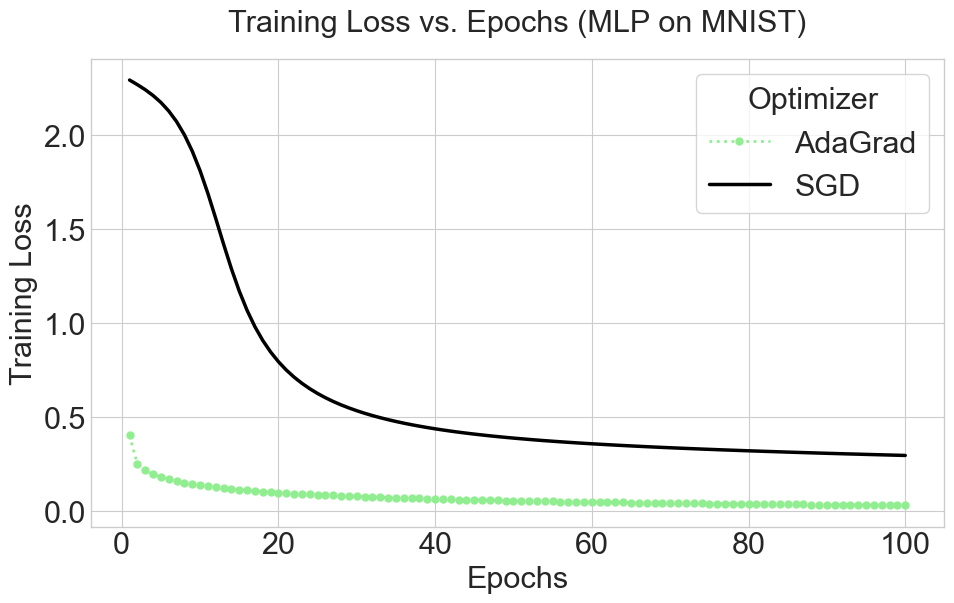

PLOT SAVE IN: Analysis_1_Impact_on_Adaptive_Gradient\Analysis_1_Impact_on_Adaptive_Gradient1_mnist_mlp_training_loss.png


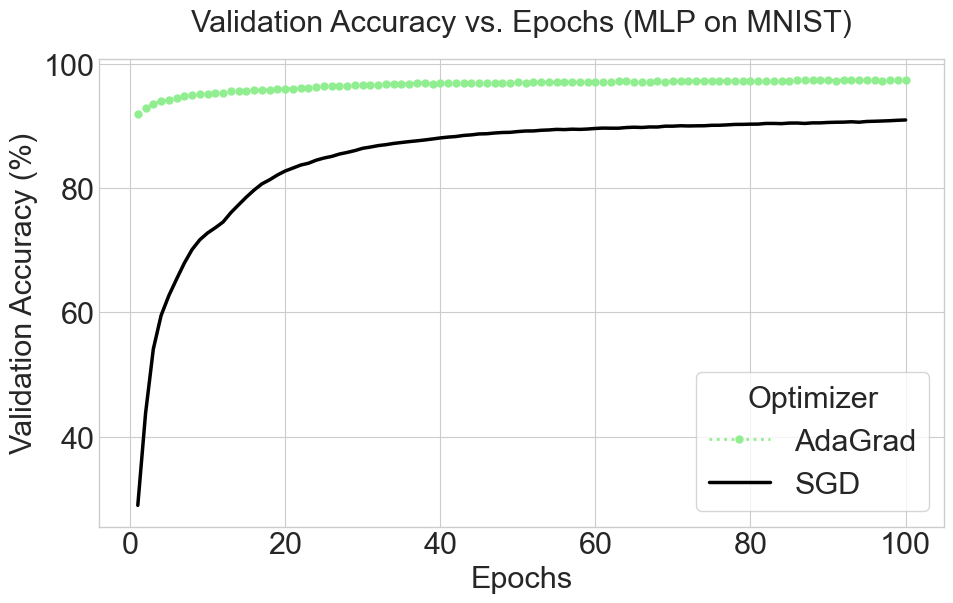

PLOT SAVE IN: Analysis_1_Impact_on_Adaptive_Gradient\Analysis_1_Impact_on_Adaptive_Gradient1_mnist_mlp_validation_accuracy.png

--- MANIPULATING TASK: CNN on CIFAR-10 ---


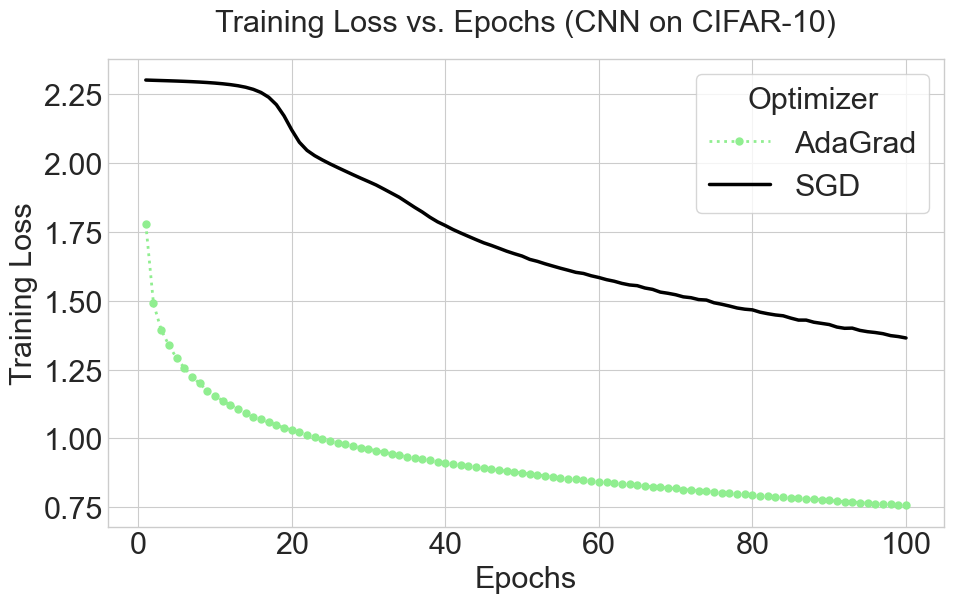

PLOT SAVE IN: Analysis_1_Impact_on_Adaptive_Gradient\Analysis_1_Impact_on_Adaptive_Gradient2_cifar10_cnn_training_loss.png


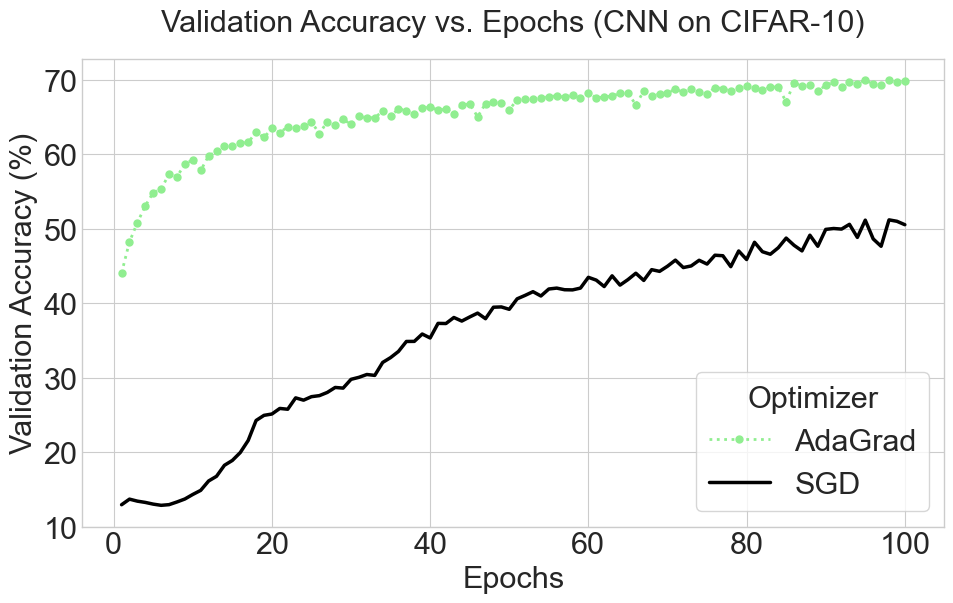

PLOT SAVE IN: Analysis_1_Impact_on_Adaptive_Gradient\Analysis_1_Impact_on_Adaptive_Gradient2_cifar10_cnn_validation_accuracy.png

--- MANIPULATING TASK: VGG13 on CIFAR-10 ---


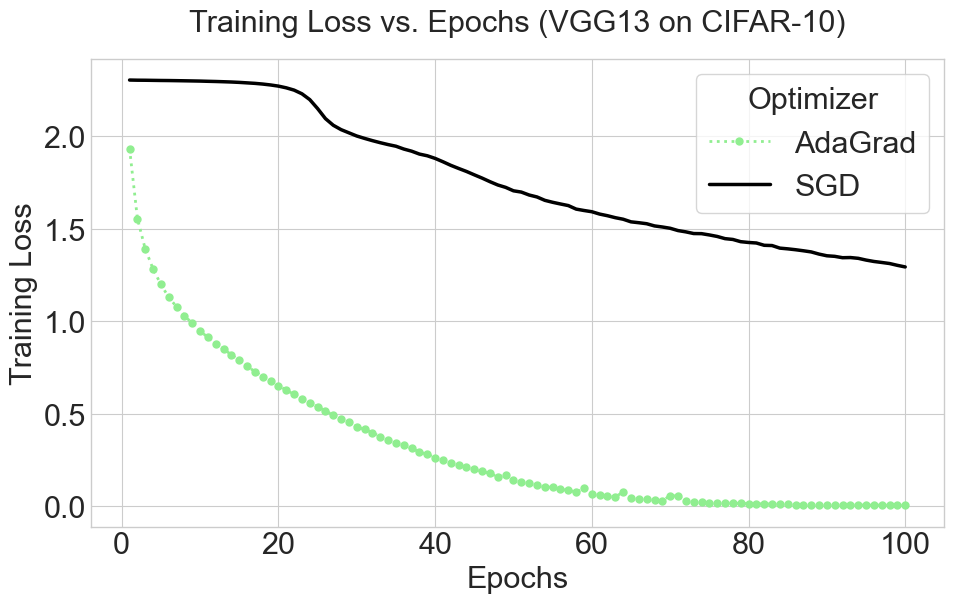

PLOT SAVE IN: Analysis_1_Impact_on_Adaptive_Gradient\Analysis_1_Impact_on_Adaptive_Gradient3_cifar_vgg13_training_loss.png


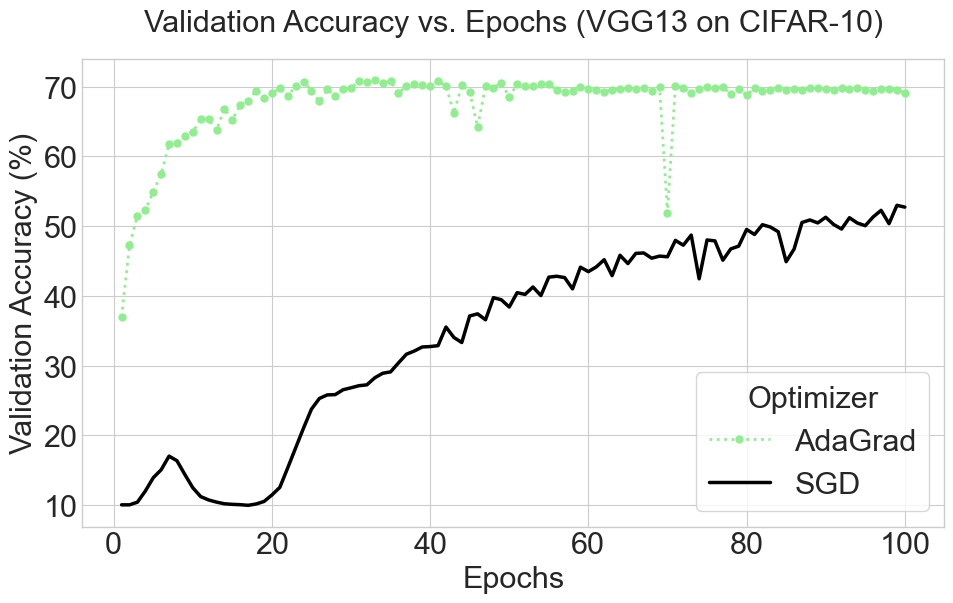

PLOT SAVE IN: Analysis_1_Impact_on_Adaptive_Gradient\Analysis_1_Impact_on_Adaptive_Gradient3_cifar_vgg13_validation_accuracy.png

--- Generating Table for: Table 1: Final Test Accuracy (AdaGrad vs. SGD) ---



TABLE SAVED AS HTML: Analysis_1_Impact_on_Adaptive_Gradient\comparison_table.html


In [16]:
plots = Plots()
plots.optimizers("SGD", "AdaGrad")
plots.output_dir("Analysis_1_Impact_on_Adaptive_Gradient")
plots.table_caption("Table 1: Final Test Accuracy (AdaGrad vs. SGD)")
plots.generate()

### 2. Impact of Exponential Moving Average

AdaGrad vs. RMSProp


--- MANIPULATING TASK: MLP on MNIST ---


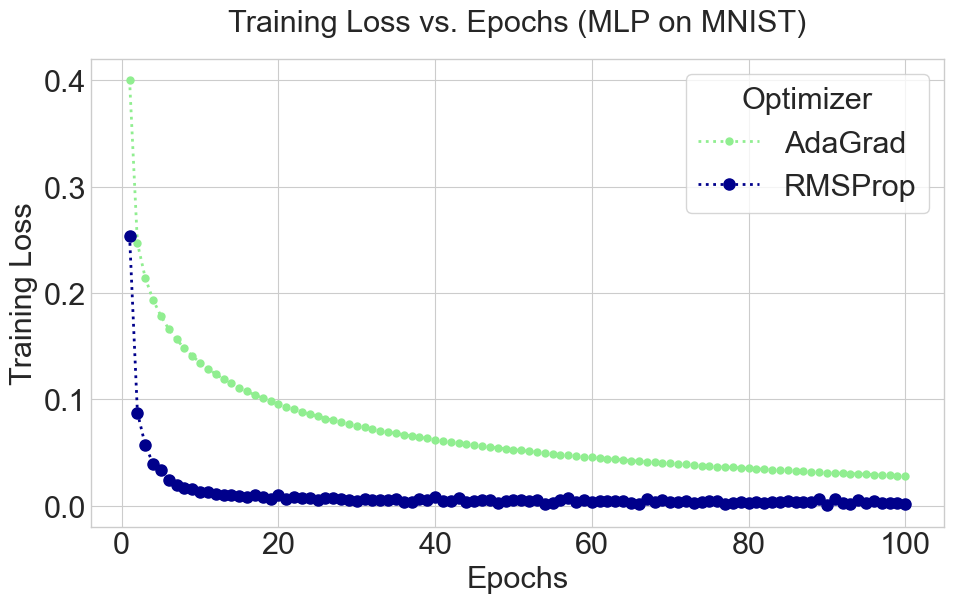

PLOT SAVE IN: Analysis_2_Impact_of_EMA\Analysis_2_Impact_of_EMA1_mnist_mlp_training_loss.png


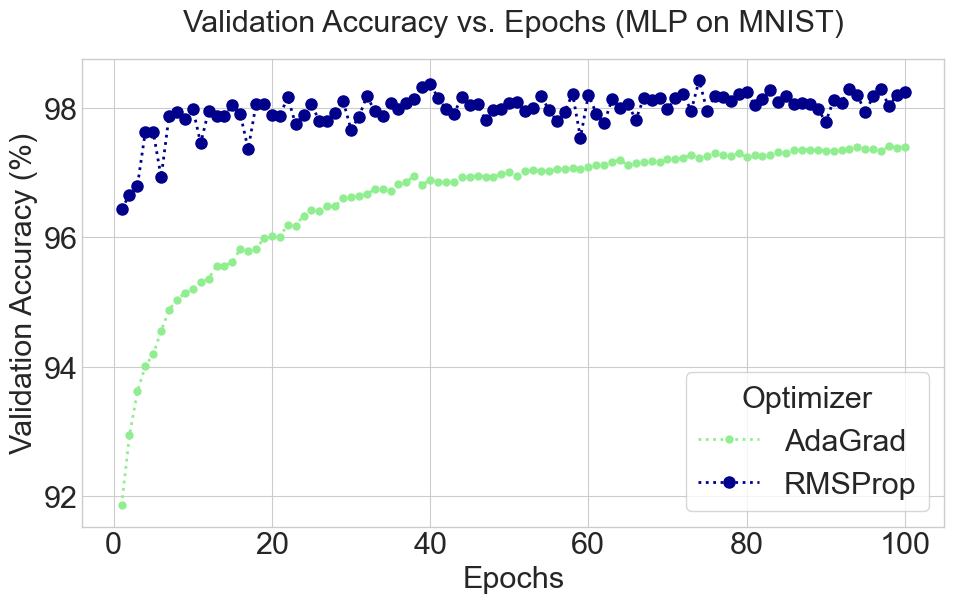

PLOT SAVE IN: Analysis_2_Impact_of_EMA\Analysis_2_Impact_of_EMA1_mnist_mlp_validation_accuracy.png

--- MANIPULATING TASK: CNN on CIFAR-10 ---


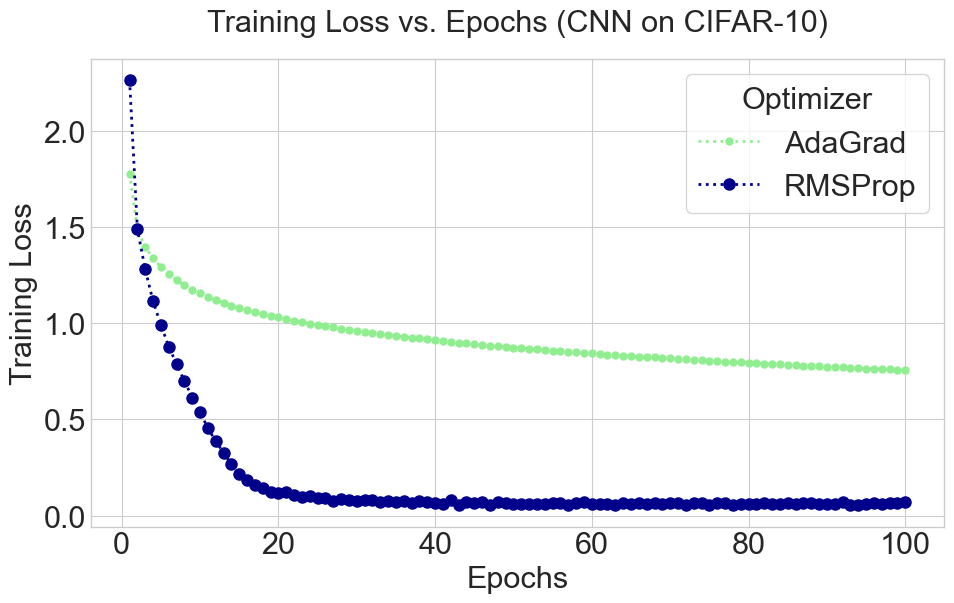

PLOT SAVE IN: Analysis_2_Impact_of_EMA\Analysis_2_Impact_of_EMA2_cifar10_cnn_training_loss.png


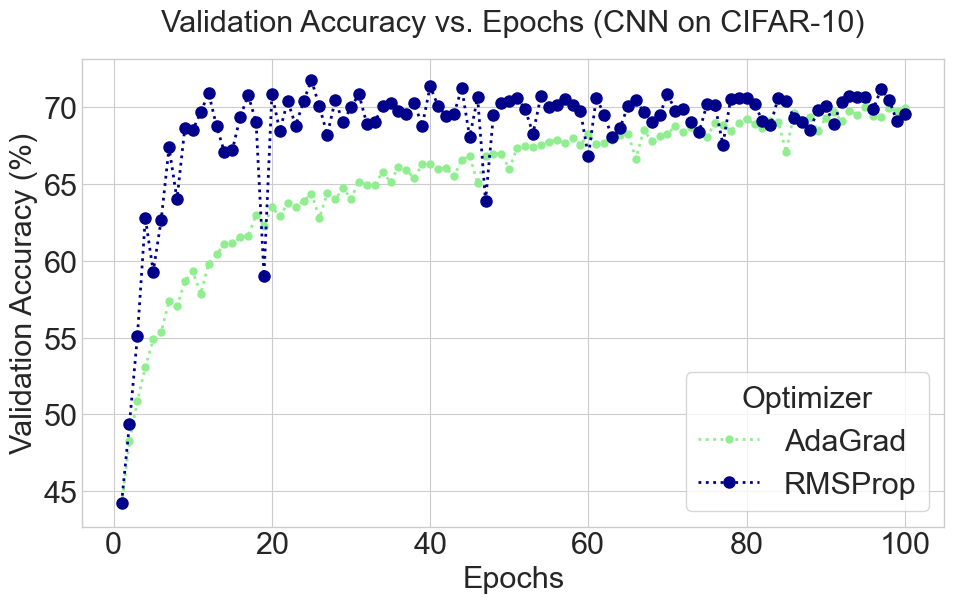

PLOT SAVE IN: Analysis_2_Impact_of_EMA\Analysis_2_Impact_of_EMA2_cifar10_cnn_validation_accuracy.png

--- MANIPULATING TASK: VGG13 on CIFAR-10 ---


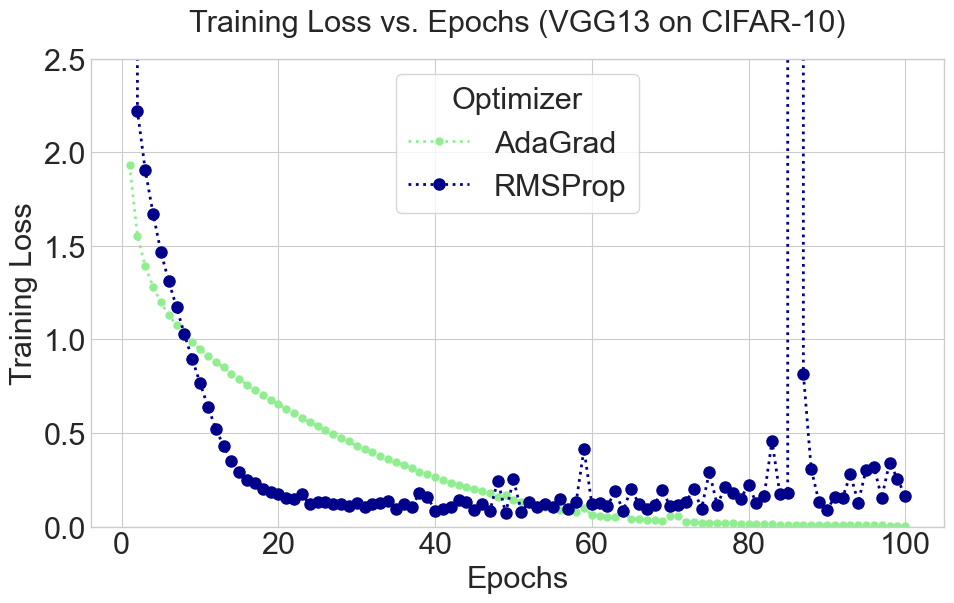

PLOT SAVE IN: Analysis_2_Impact_of_EMA\Analysis_2_Impact_of_EMA3_cifar_vgg13_training_loss.png


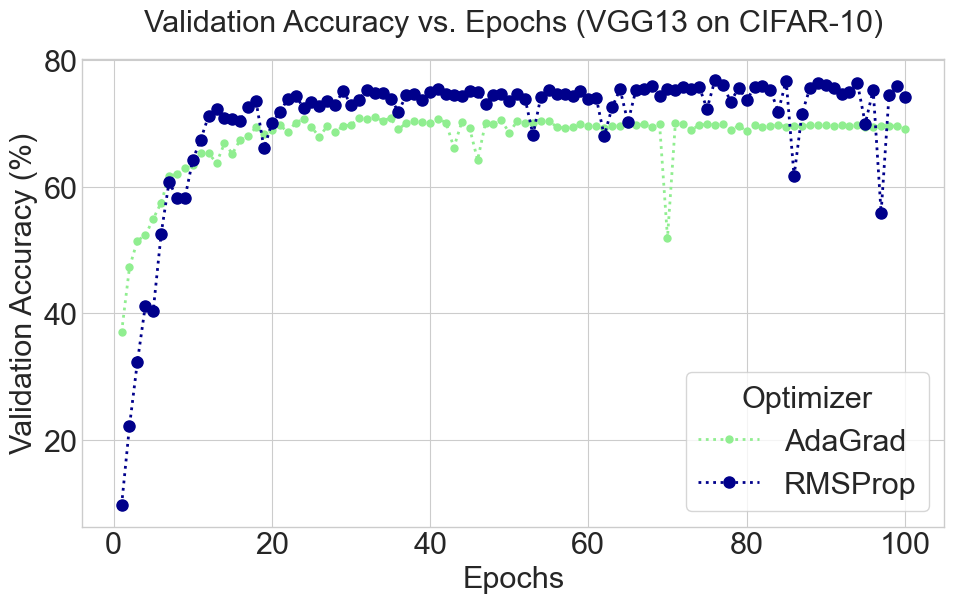

PLOT SAVE IN: Analysis_2_Impact_of_EMA\Analysis_2_Impact_of_EMA3_cifar_vgg13_validation_accuracy.png

--- Generating Table for: Table 2: Final Test Accuracy (RMSProp vs. AdaGrad) ---



TABLE SAVED AS HTML: Analysis_2_Impact_of_EMA\comparison_table.html


In [17]:
# 2: Impact of Exponential Moving Average
plots = Plots()
plots.optimizers("AdaGrad", "RMSProp")
plots.output_dir("Analysis_2_Impact_of_EMA")
plots.table_caption("Table 2: Final Test Accuracy (RMSProp vs. AdaGrad)")
plots.generate(loss_yranges={
        'VGG13 on CIFAR-10': (0, 2.5) 
    })

### 3. Impact of Momentum

Nesterov vs. SGD


--- MANIPULATING TASK: MLP on MNIST ---


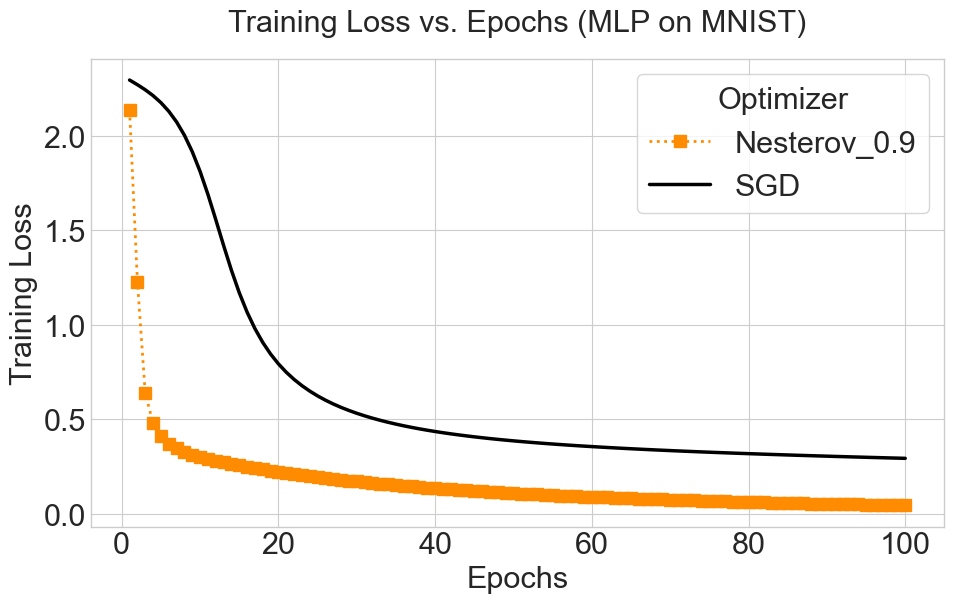

PLOT SAVE IN: Analysis_3_Impact_of_Momentum\Analysis_3_Impact_of_Momentum1_mnist_mlp_training_loss.png


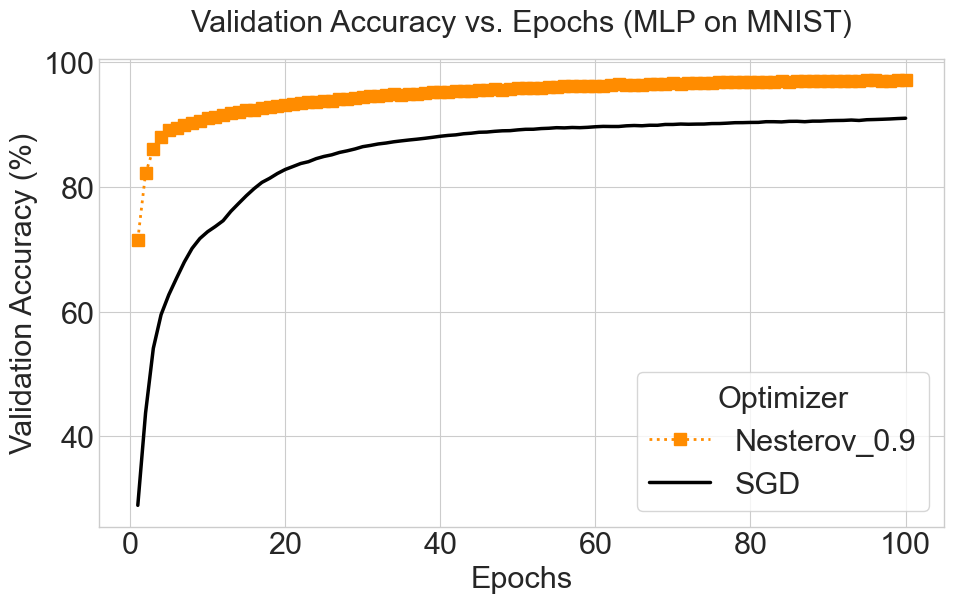

PLOT SAVE IN: Analysis_3_Impact_of_Momentum\Analysis_3_Impact_of_Momentum1_mnist_mlp_validation_accuracy.png

--- MANIPULATING TASK: CNN on CIFAR-10 ---


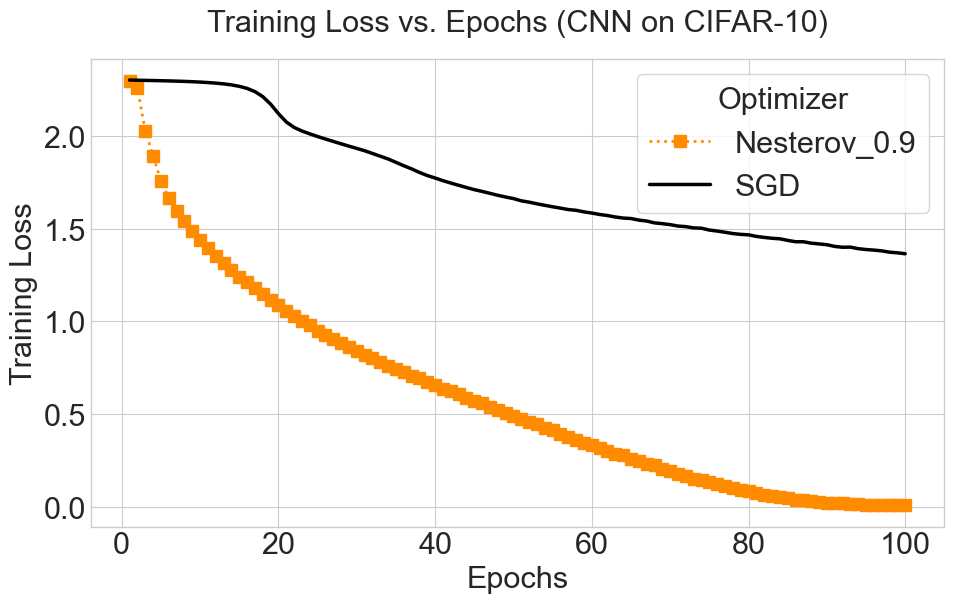

PLOT SAVE IN: Analysis_3_Impact_of_Momentum\Analysis_3_Impact_of_Momentum2_cifar10_cnn_training_loss.png


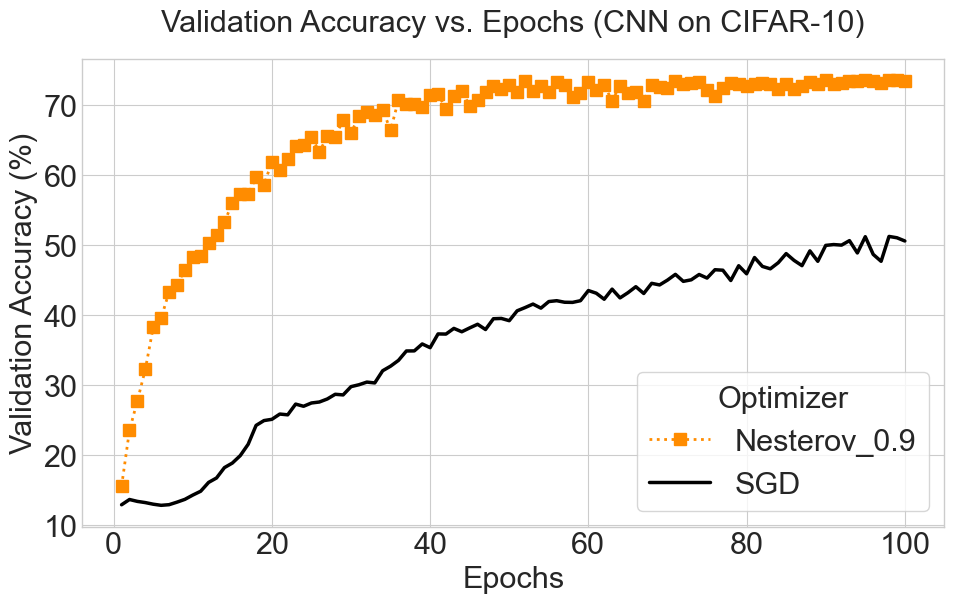

PLOT SAVE IN: Analysis_3_Impact_of_Momentum\Analysis_3_Impact_of_Momentum2_cifar10_cnn_validation_accuracy.png

--- MANIPULATING TASK: VGG13 on CIFAR-10 ---


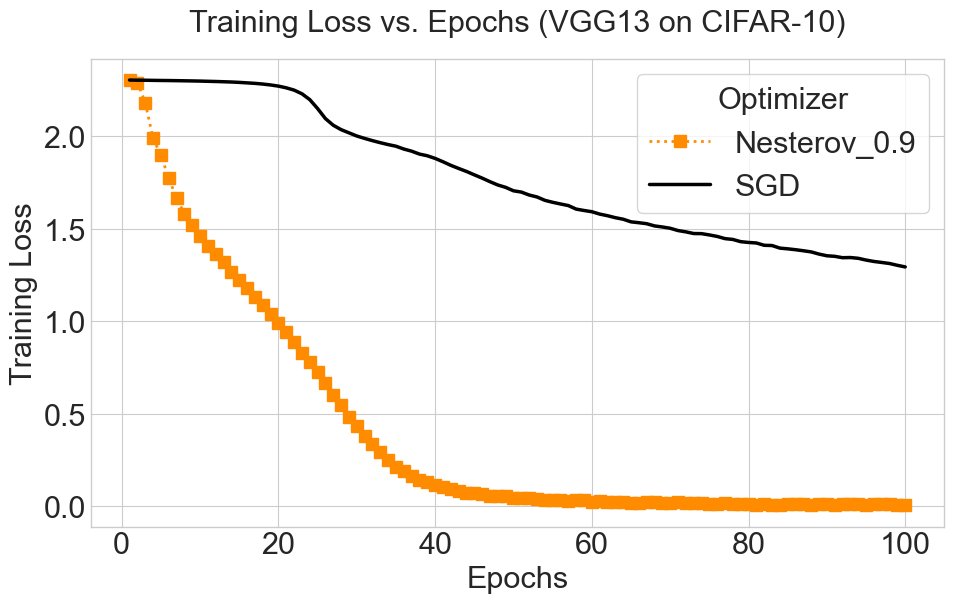

PLOT SAVE IN: Analysis_3_Impact_of_Momentum\Analysis_3_Impact_of_Momentum3_cifar_vgg13_training_loss.png


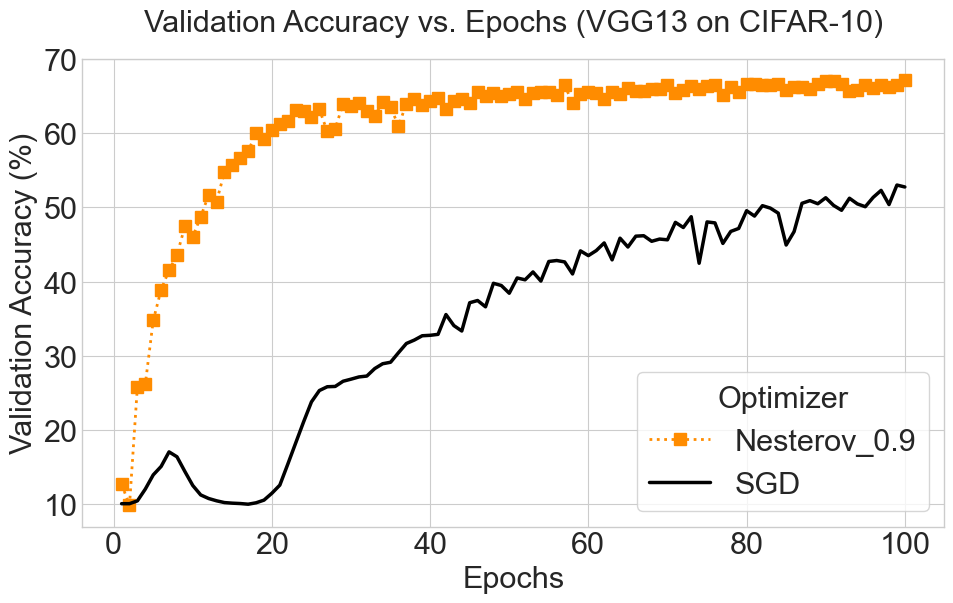

PLOT SAVE IN: Analysis_3_Impact_of_Momentum\Analysis_3_Impact_of_Momentum3_cifar_vgg13_validation_accuracy.png

--- Generating Table for: Table 3: Final Test Accuracy (Nesterov vs. SGD) ---



TABLE SAVED AS HTML: Analysis_3_Impact_of_Momentum\comparison_table.html


In [18]:
# 3: Impact of Momentum
plots = Plots()
plots.optimizers("Nesterov_0.9", "SGD")
plots.output_dir("Analysis_3_Impact_of_Momentum")
plots.table_caption("Table 3: Final Test Accuracy (Nesterov vs. SGD)")
plots.generate()

### 4. Joint Impact of Exponential Moving Average and Momentum

Adam vs. RMSProp vs. Nesterov vs. SGD


--- MANIPULATING TASK: MLP on MNIST ---


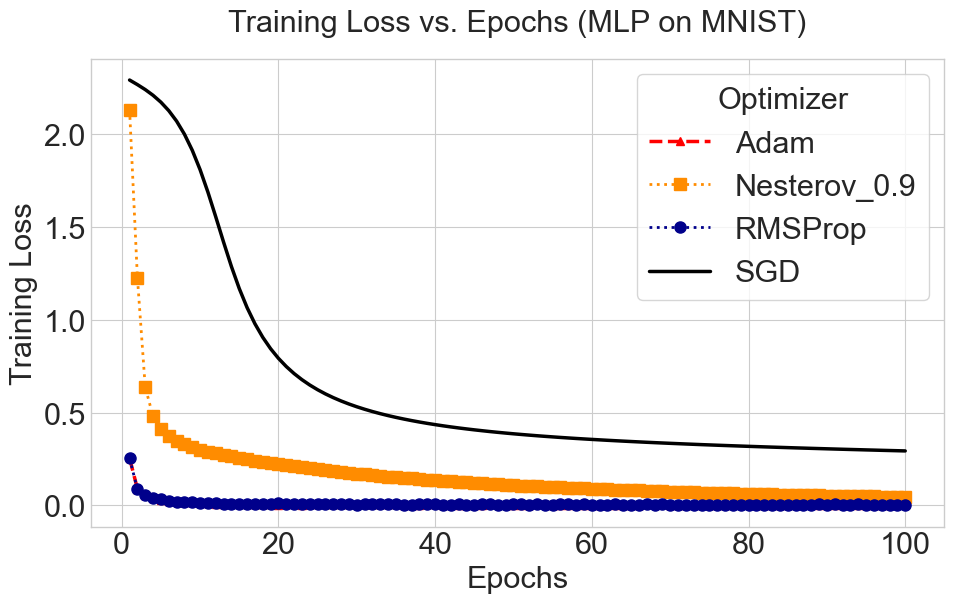

PLOT SAVE IN: Analysis_4_Joint_Impact\Analysis_4_Joint_Impact1_mnist_mlp_training_loss.png


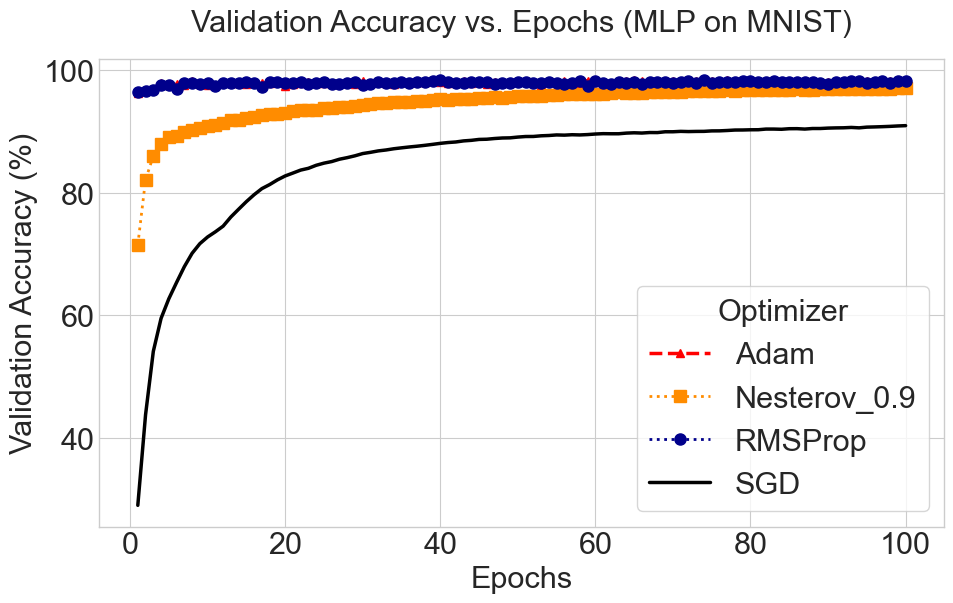

PLOT SAVE IN: Analysis_4_Joint_Impact\Analysis_4_Joint_Impact1_mnist_mlp_validation_accuracy.png

--- MANIPULATING TASK: CNN on CIFAR-10 ---


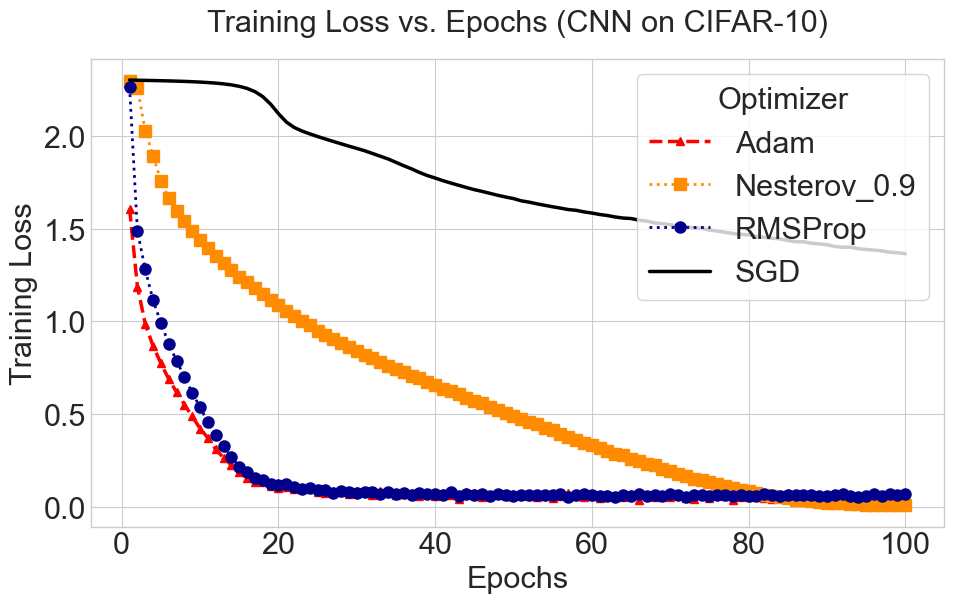

PLOT SAVE IN: Analysis_4_Joint_Impact\Analysis_4_Joint_Impact2_cifar10_cnn_training_loss.png


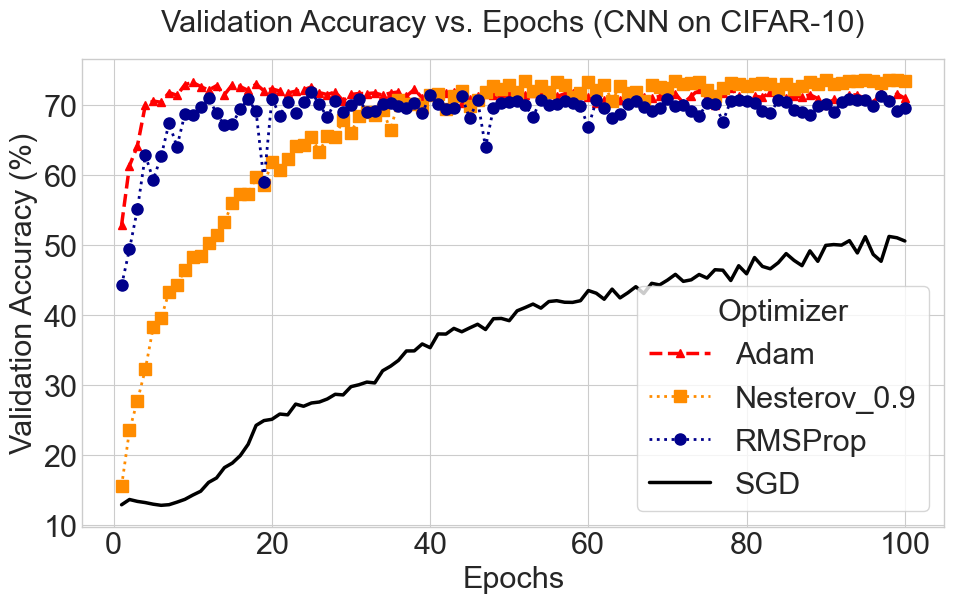

PLOT SAVE IN: Analysis_4_Joint_Impact\Analysis_4_Joint_Impact2_cifar10_cnn_validation_accuracy.png

--- MANIPULATING TASK: VGG13 on CIFAR-10 ---


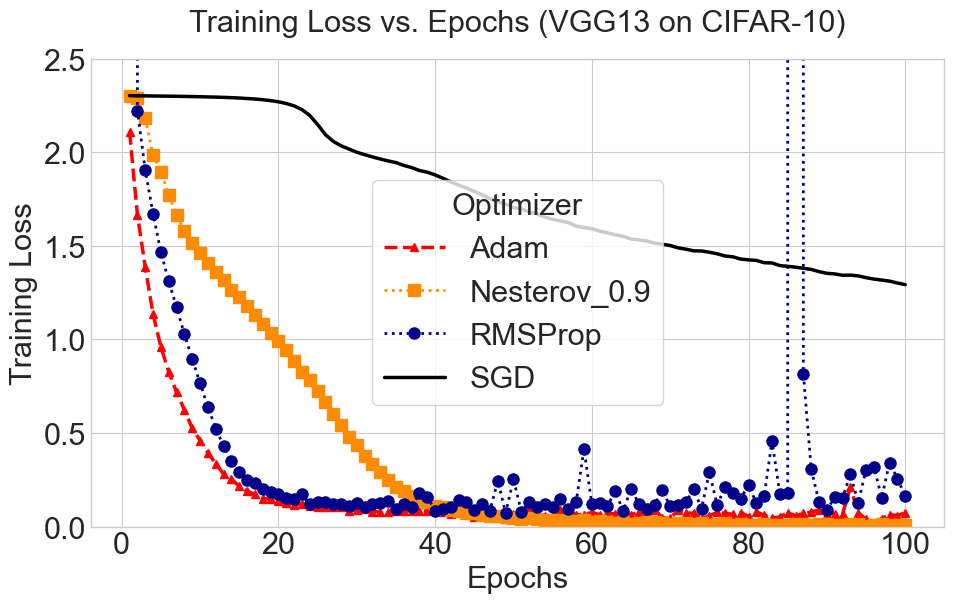

PLOT SAVE IN: Analysis_4_Joint_Impact\Analysis_4_Joint_Impact3_cifar_vgg13_training_loss.png


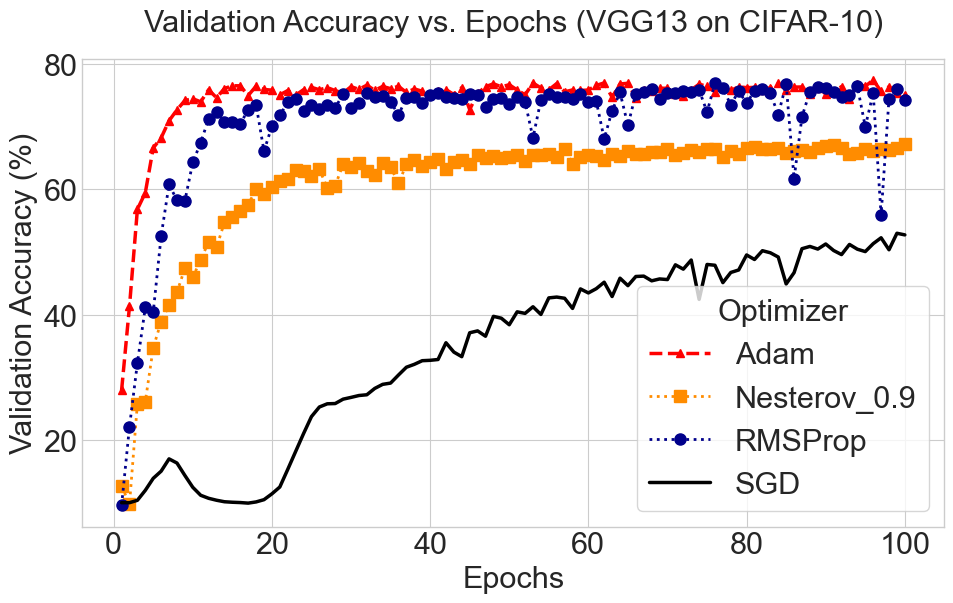

PLOT SAVE IN: Analysis_4_Joint_Impact\Analysis_4_Joint_Impact3_cifar_vgg13_validation_accuracy.png

--- Generating Table for: Table 4: Final Test Accuracy (Joint Impact) ---



TABLE SAVED AS HTML: Analysis_4_Joint_Impact\comparison_table.html


In [19]:
# 4: Joint Impact of Exponential Moving Average and Momentum
# Adam vs. RMSProp vs. Nesterov vs. SGD

plots_joint = Plots()
plots_joint.optimizers("Adam", "RMSProp", "Nesterov_0.9", "SGD")
plots_joint.output_dir("Analysis_4_Joint_Impact")
plots_joint.table_caption("Table 4: Final Test Accuracy (Joint Impact)")
plots_joint.generate(
    loss_yranges={
        'VGG13 on CIFAR-10': (0, 2.5) 
    }
)


--- MANIPULATING TASK: MLP on MNIST ---


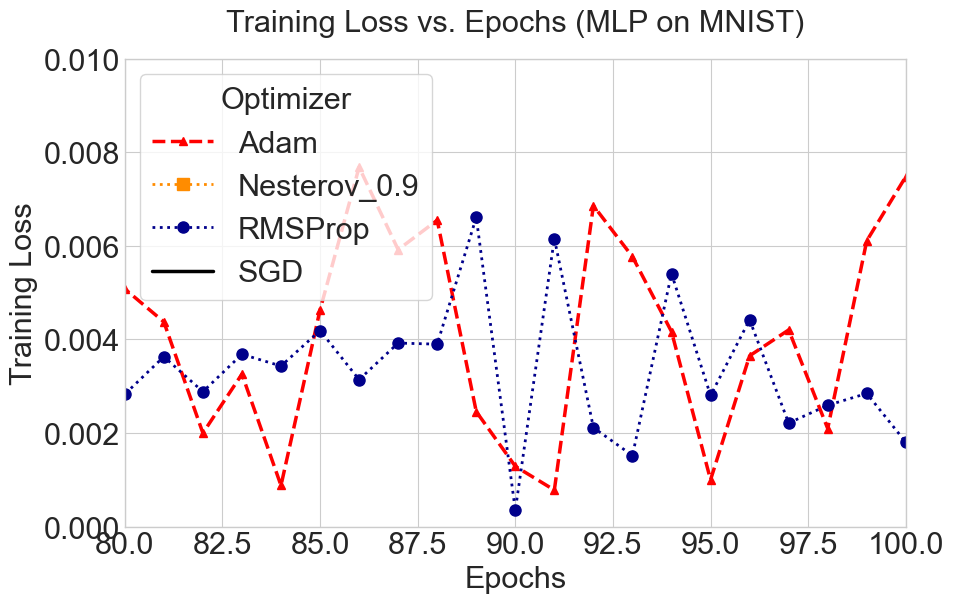

PLOT SAVE IN: Analysis_4_Joint_Impact_PARTIAL_DETAILS\Analysis_4_Joint_Impact_PARTIAL_DETAILS1_mnist_mlp_training_loss.png


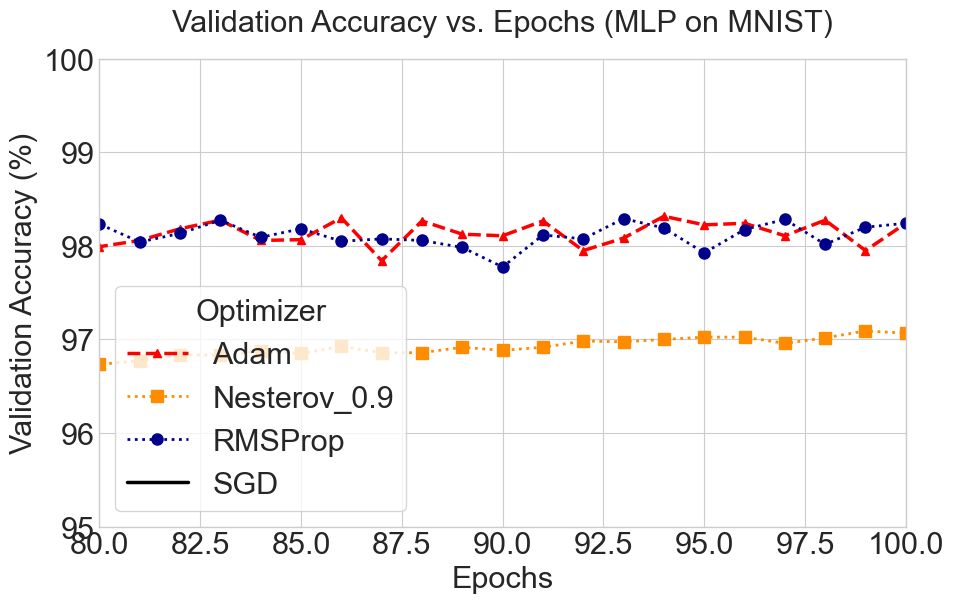

PLOT SAVE IN: Analysis_4_Joint_Impact_PARTIAL_DETAILS\Analysis_4_Joint_Impact_PARTIAL_DETAILS1_mnist_mlp_validation_accuracy.png

--- MANIPULATING TASK: CNN on CIFAR-10 ---


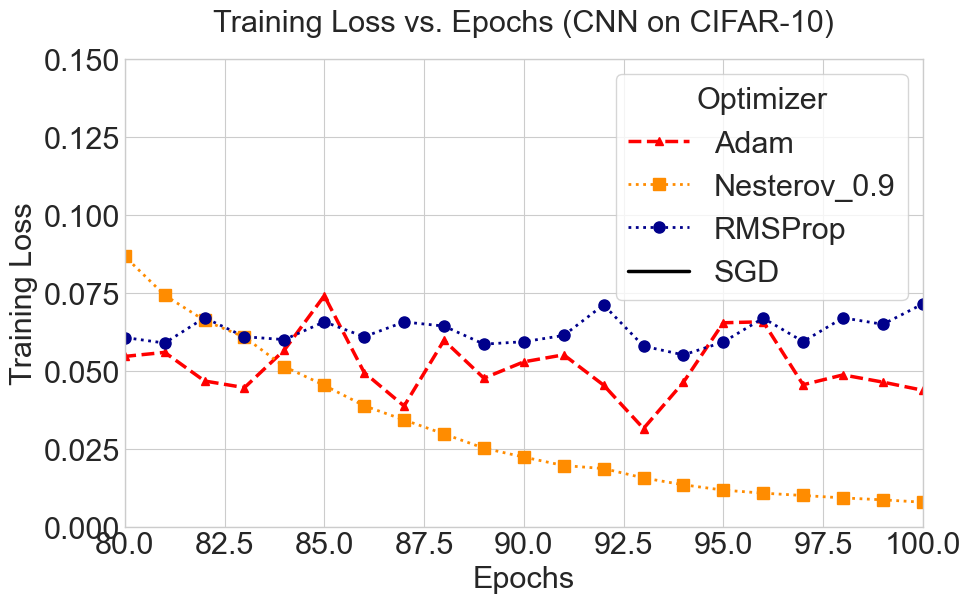

PLOT SAVE IN: Analysis_4_Joint_Impact_PARTIAL_DETAILS\Analysis_4_Joint_Impact_PARTIAL_DETAILS2_cifar10_cnn_training_loss.png


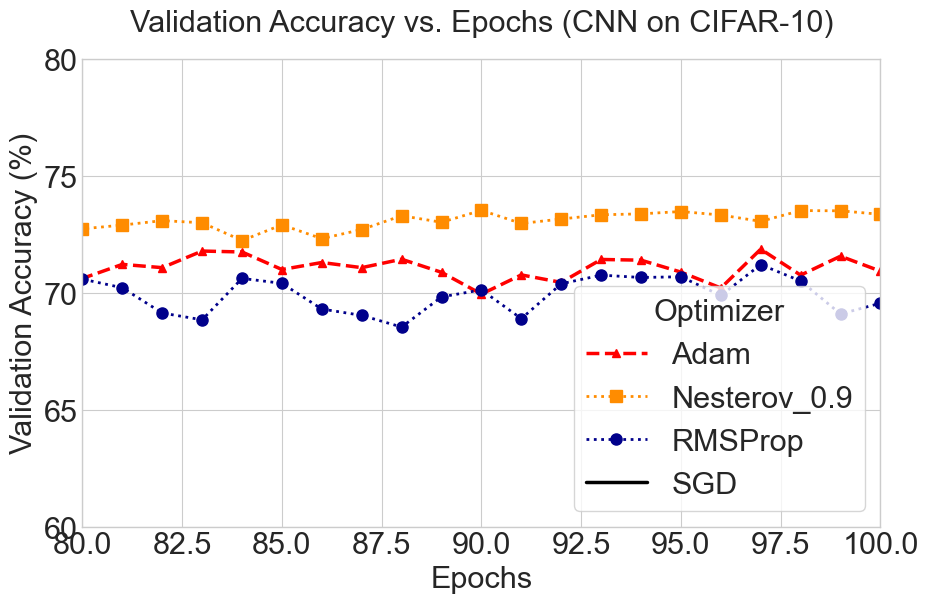

PLOT SAVE IN: Analysis_4_Joint_Impact_PARTIAL_DETAILS\Analysis_4_Joint_Impact_PARTIAL_DETAILS2_cifar10_cnn_validation_accuracy.png

--- MANIPULATING TASK: VGG13 on CIFAR-10 ---


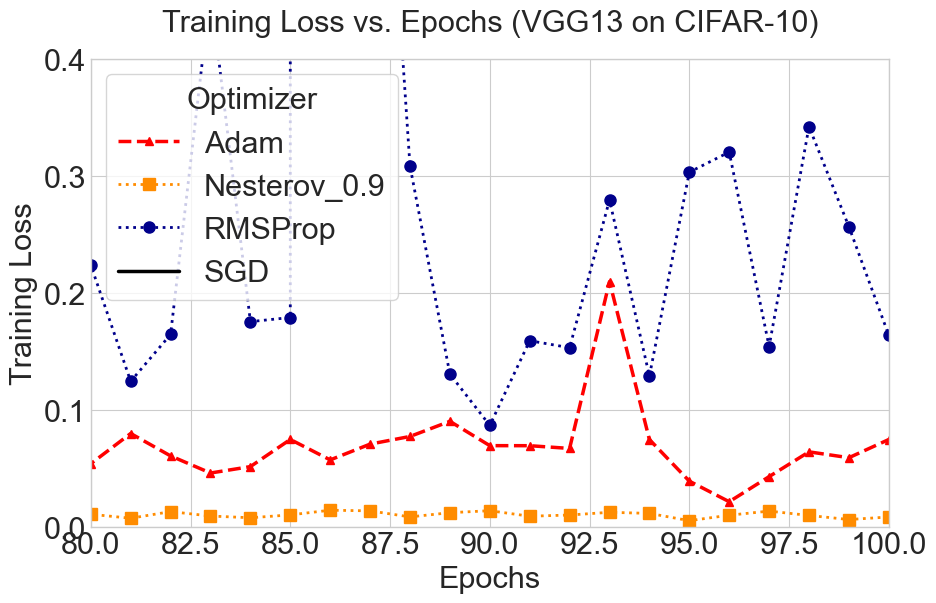

PLOT SAVE IN: Analysis_4_Joint_Impact_PARTIAL_DETAILS\Analysis_4_Joint_Impact_PARTIAL_DETAILS3_cifar_vgg13_training_loss.png


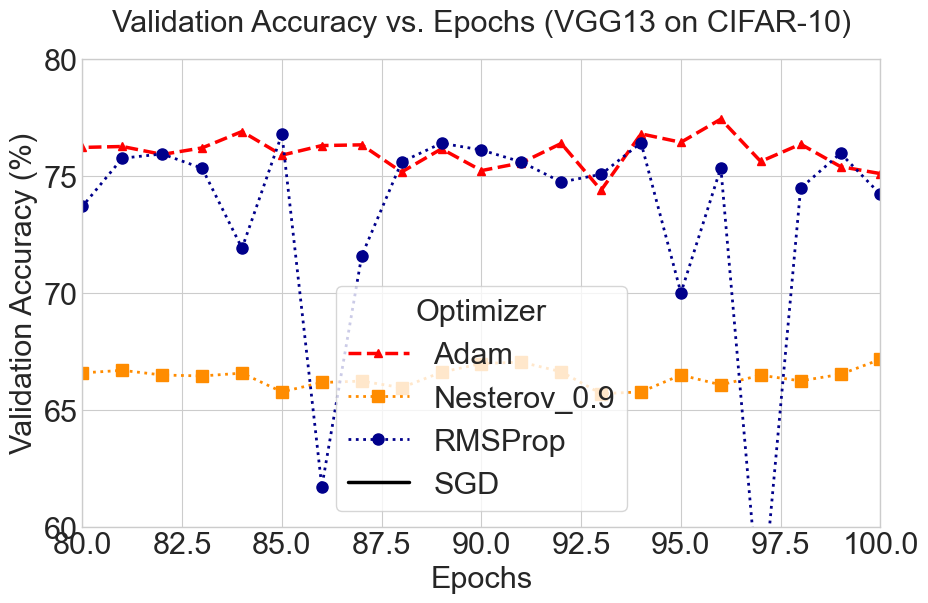

PLOT SAVE IN: Analysis_4_Joint_Impact_PARTIAL_DETAILS\Analysis_4_Joint_Impact_PARTIAL_DETAILS3_cifar_vgg13_validation_accuracy.png

--- Generating Table for: Table 4: Final Test Accuracy (Joint Impact) ---



TABLE SAVED AS HTML: Analysis_4_Joint_Impact_PARTIAL_DETAILS\comparison_table.html


In [20]:
# 4: Joint Impact of Exponential Moving Average and Momentum (PARTIAL)
# Adam vs. RMSProp vs. Nesterov vs. SGD

plots_joint = Plots()
plots_joint.optimizers("Adam", "RMSProp", "Nesterov_0.9", "SGD")
plots_joint.output_dir("Analysis_4_Joint_Impact_PARTIAL_DETAILS")
plots_joint.table_caption("Table 4: Final Test Accuracy (Joint Impact)")
plots_joint.generate(
    loss_yranges={
        'MLP on MNIST': (0, 0.01),
        'CNN on CIFAR-10': (0, 0.15),
        'VGG13 on CIFAR-10': (0, 0.4) 
    },
    acc_yranges={
        'MLP on MNIST': (95, 100),
        'CNN on CIFAR-10': (60, 80),
        'VGG13 on CIFAR-10': (60, 80) 
    },
    epoch_range=(80, 100)
    )

### 5. (Extra Analysis) All Optimizers Comparison


--- MANIPULATING TASK: MLP on MNIST ---


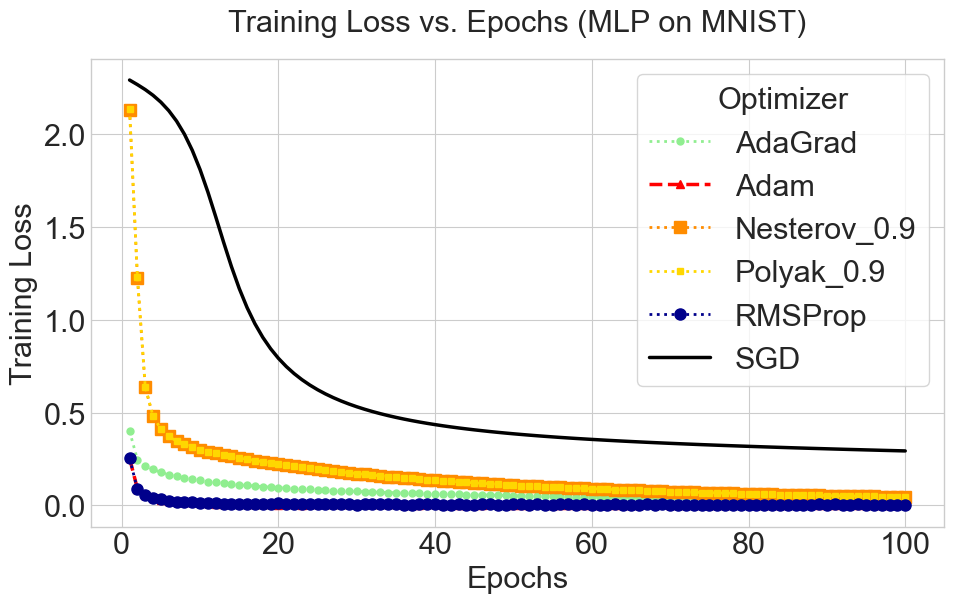

PLOT SAVE IN: Analysis_5_Comprehensive_Comparison\Analysis_5_Comprehensive_Comparison1_mnist_mlp_training_loss.png


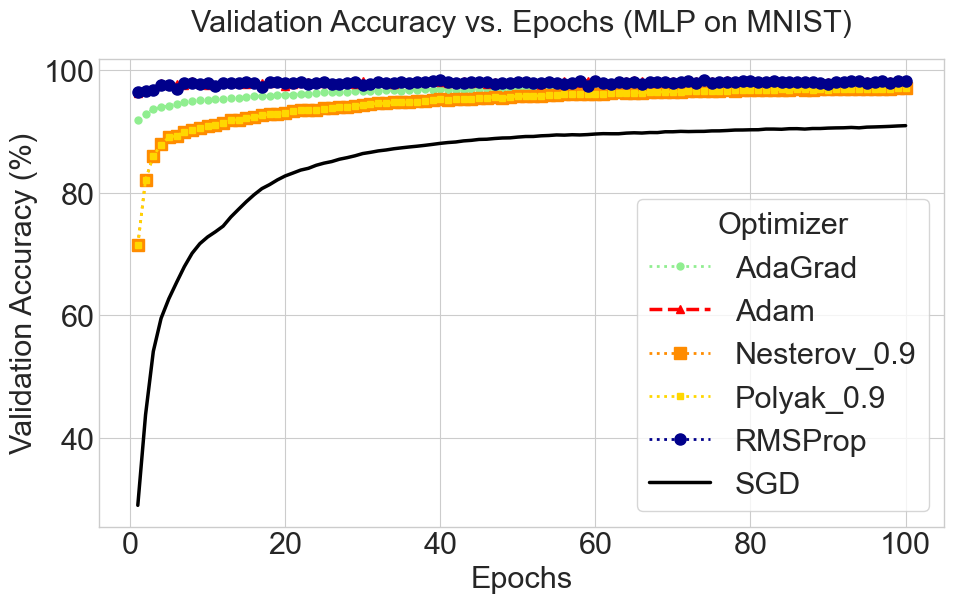

PLOT SAVE IN: Analysis_5_Comprehensive_Comparison\Analysis_5_Comprehensive_Comparison1_mnist_mlp_validation_accuracy.png

--- MANIPULATING TASK: CNN on CIFAR-10 ---


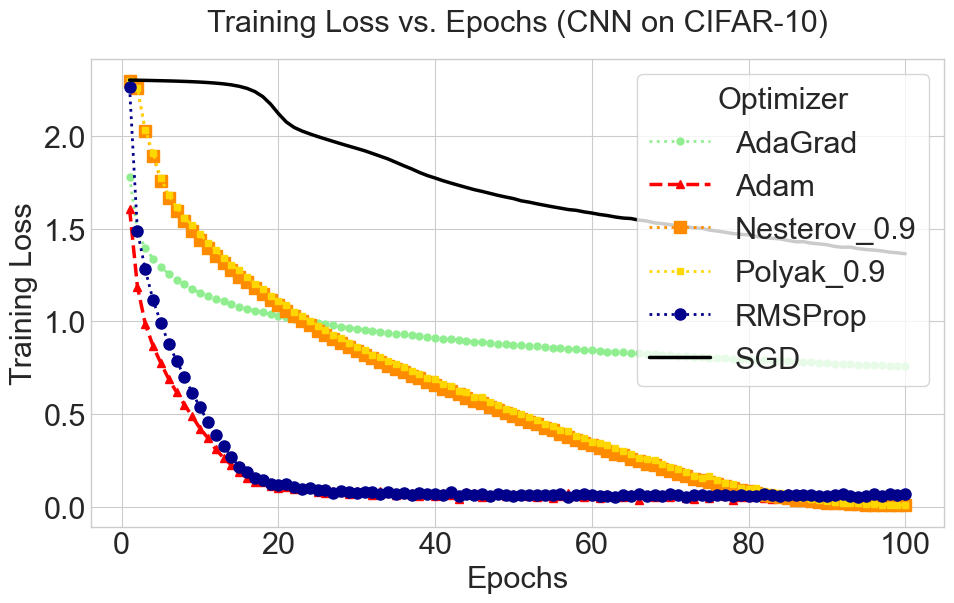

PLOT SAVE IN: Analysis_5_Comprehensive_Comparison\Analysis_5_Comprehensive_Comparison2_cifar10_cnn_training_loss.png


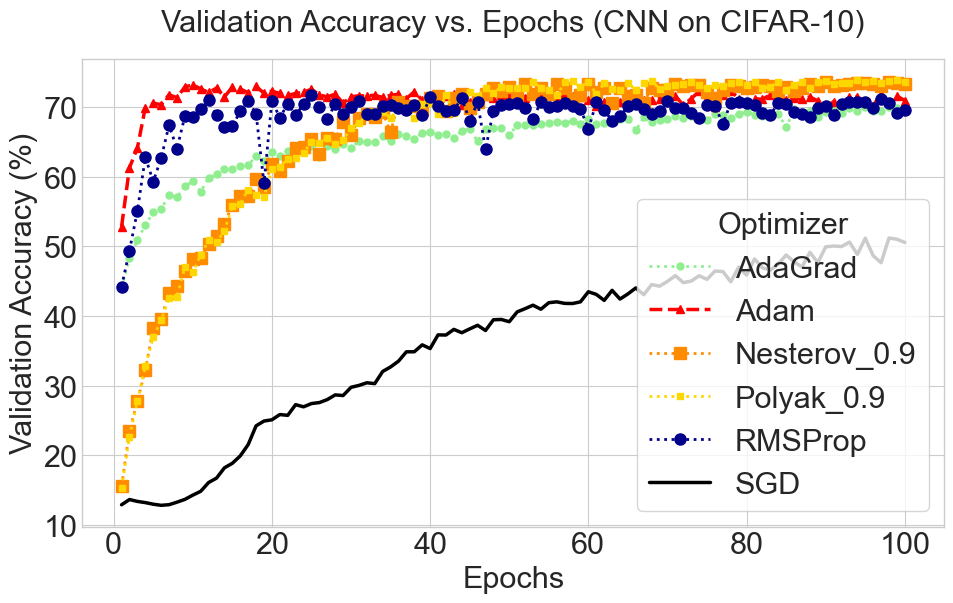

PLOT SAVE IN: Analysis_5_Comprehensive_Comparison\Analysis_5_Comprehensive_Comparison2_cifar10_cnn_validation_accuracy.png

--- MANIPULATING TASK: VGG13 on CIFAR-10 ---


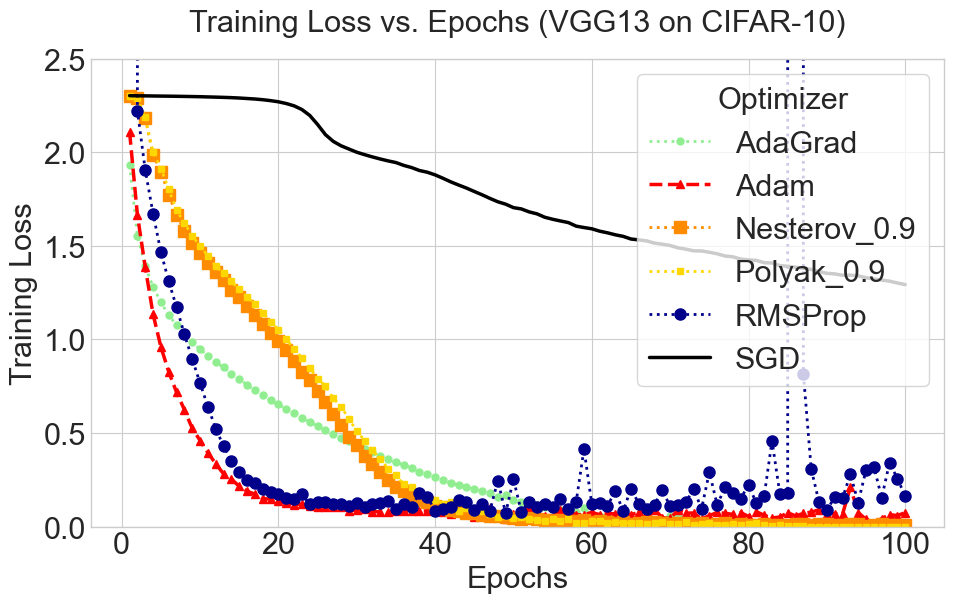

PLOT SAVE IN: Analysis_5_Comprehensive_Comparison\Analysis_5_Comprehensive_Comparison3_cifar_vgg13_training_loss.png


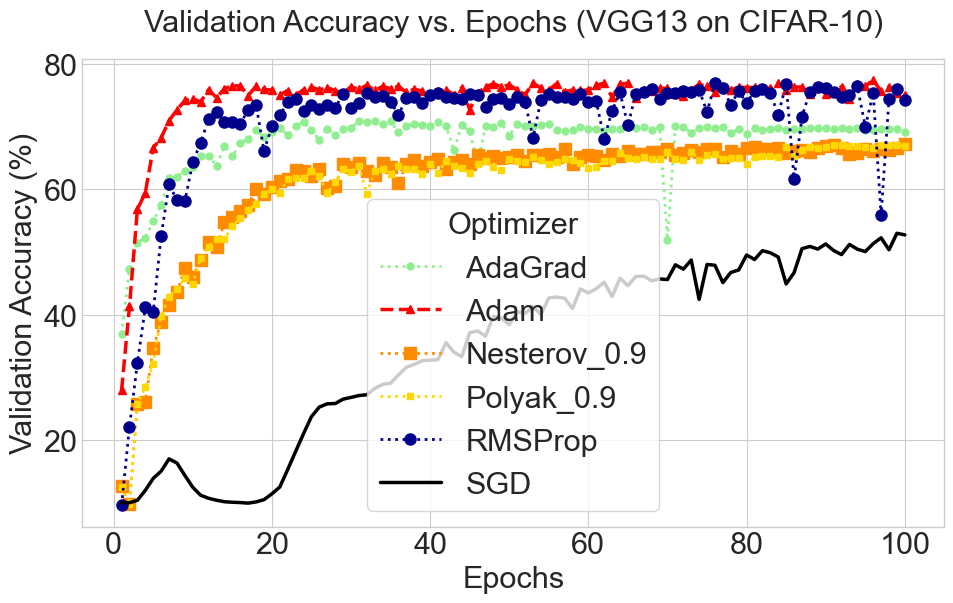

PLOT SAVE IN: Analysis_5_Comprehensive_Comparison\Analysis_5_Comprehensive_Comparison3_cifar_vgg13_validation_accuracy.png

--- Generating Table for: Comprehensive Comparison: Final Test Accuracy of All Optimizers ---



TABLE SAVED AS HTML: Analysis_5_Comprehensive_Comparison\comparison_table.html


In [21]:
# Extra Analysis: All Optimizers Comparison

plots_all = Plots()
plots_all.optimizers("SGD", "AdaGrad", "RMSProp", "Adam", "Polyak_0.9", "Nesterov_0.9")
plots_all.output_dir("Analysis_5_Comprehensive_Comparison")
plots_all.table_caption("Comprehensive Comparison: Final Test Accuracy of All Optimizers")
plots_all.generate(
    loss_yranges={
        'VGG13 on CIFAR-10': (0, 2.5) 
    }
)

### (Extra) 6. Polyuak Momentum Comparison


--- MANIPULATING TASK: MLP on MNIST ---


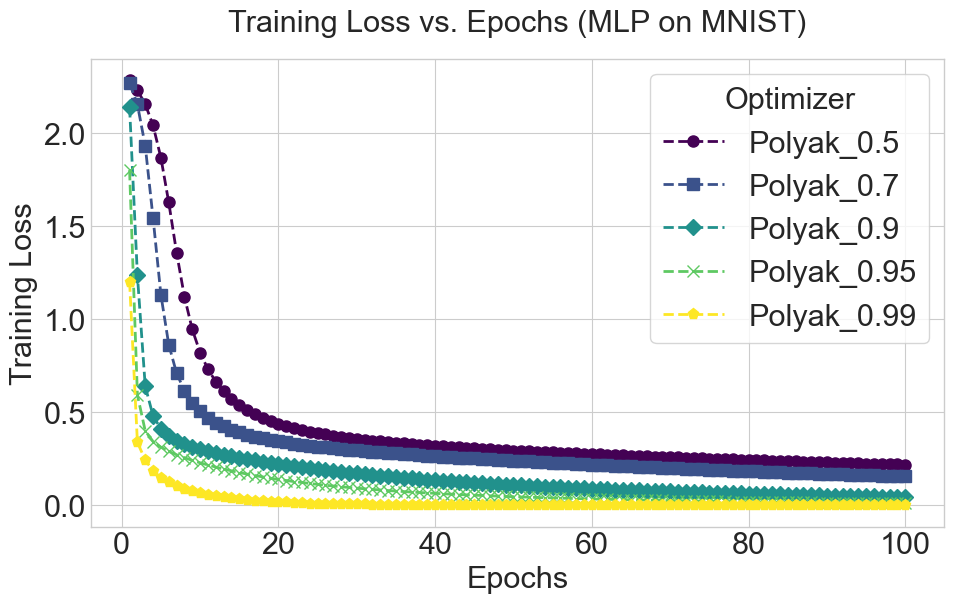

PLOT SAVE IN: Analysis_5_Polyak_Momentum\Analysis_5_Polyak_Momentum1_mnist_mlp_training_loss.png


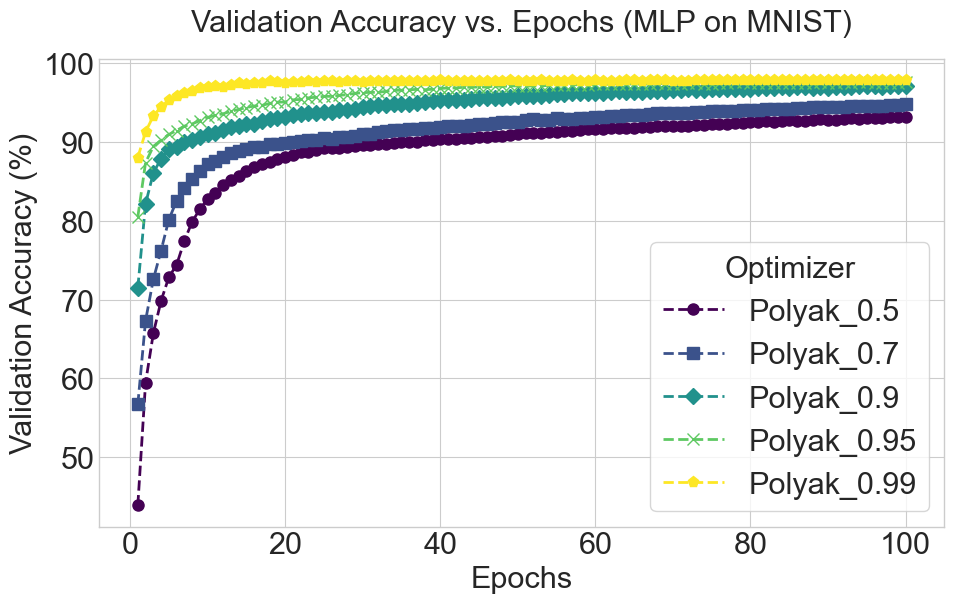

PLOT SAVE IN: Analysis_5_Polyak_Momentum\Analysis_5_Polyak_Momentum1_mnist_mlp_validation_accuracy.png

--- MANIPULATING TASK: CNN on CIFAR-10 ---


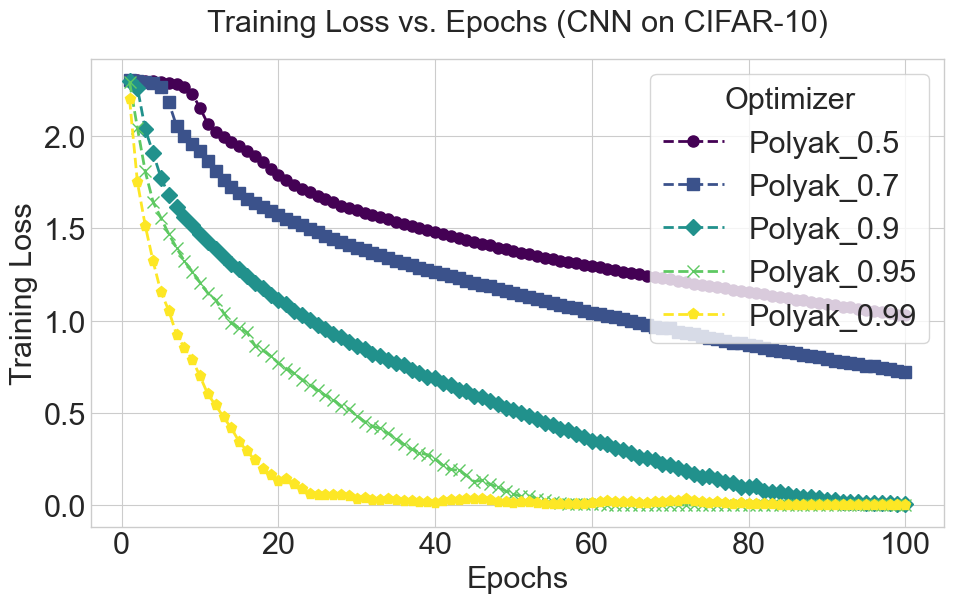

PLOT SAVE IN: Analysis_5_Polyak_Momentum\Analysis_5_Polyak_Momentum2_cifar10_cnn_training_loss.png


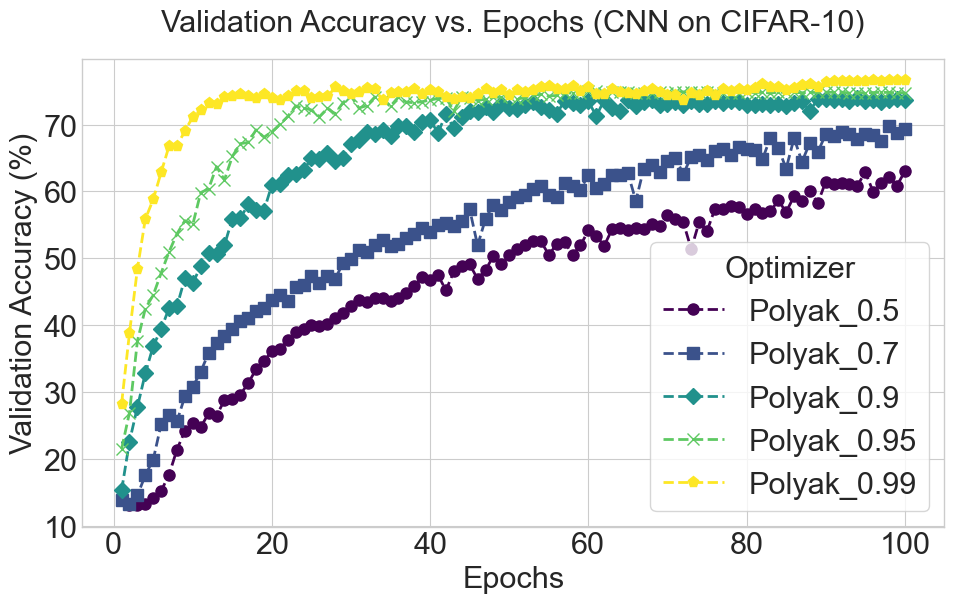

PLOT SAVE IN: Analysis_5_Polyak_Momentum\Analysis_5_Polyak_Momentum2_cifar10_cnn_validation_accuracy.png

--- MANIPULATING TASK: VGG13 on CIFAR-10 ---


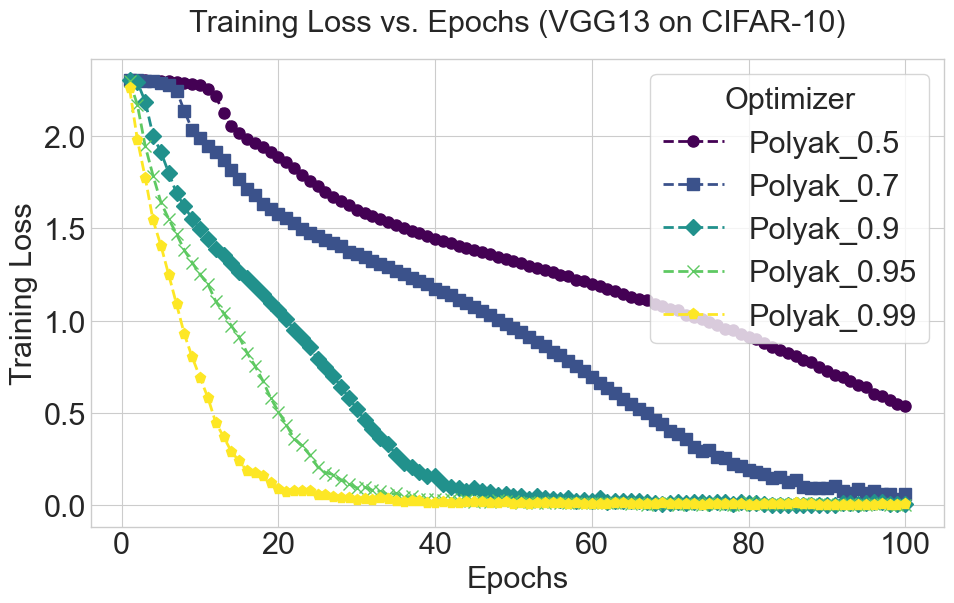

PLOT SAVE IN: Analysis_5_Polyak_Momentum\Analysis_5_Polyak_Momentum3_cifar_vgg13_training_loss.png


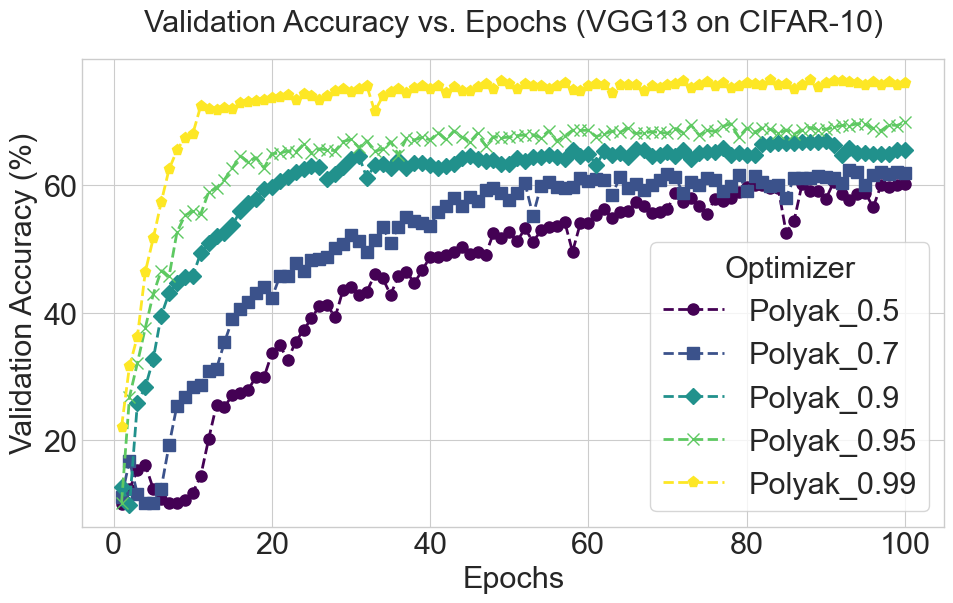

PLOT SAVE IN: Analysis_5_Polyak_Momentum\Analysis_5_Polyak_Momentum3_cifar_vgg13_validation_accuracy.png

--- Generating Table for: Final Test Accuracy (Polyak Study) ---



TABLE SAVED AS HTML: Analysis_5_Polyak_Momentum\comparison_table.html


In [22]:
# Extra Analysis: Polyak Momentum Study

plots_polyak = Plots()
plots_polyak.for_momentum_study()
plots_polyak.optimizers("Polyak_0.5", "Polyak_0.7", "Polyak_0.9", "Polyak_0.95", "Polyak_0.99")
plots_polyak.output_dir("Analysis_5_Polyak_Momentum")
plots_polyak.table_caption("Final Test Accuracy (Polyak Study)")
plots_polyak.generate()

In [23]:
### (Extra) 7. Nesterov Momentum Studies


--- MANIPULATING TASK: MLP on MNIST ---


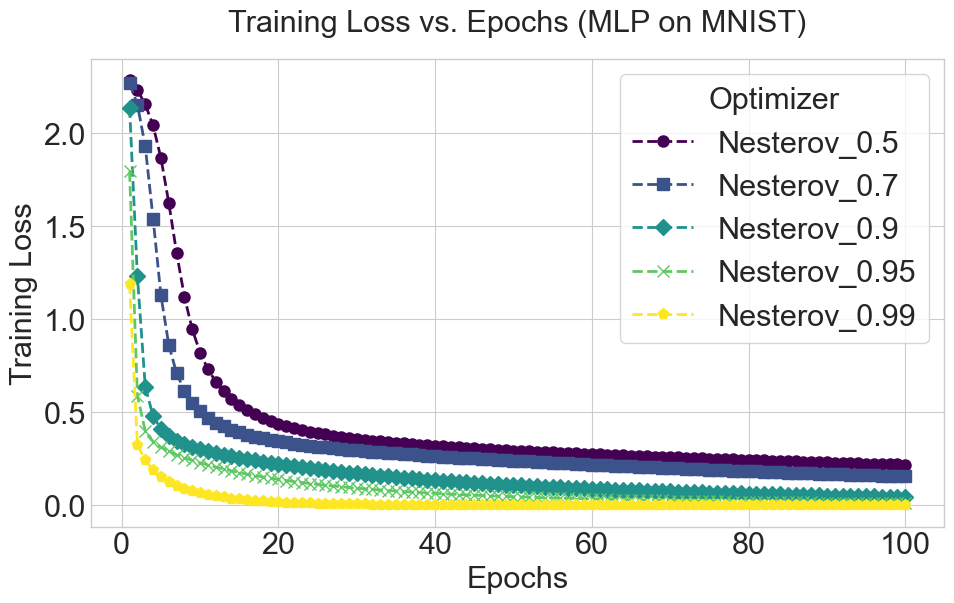

PLOT SAVE IN: Analysis_6_Nesterov_Momentum\Analysis_6_Nesterov_Momentum1_mnist_mlp_training_loss.png


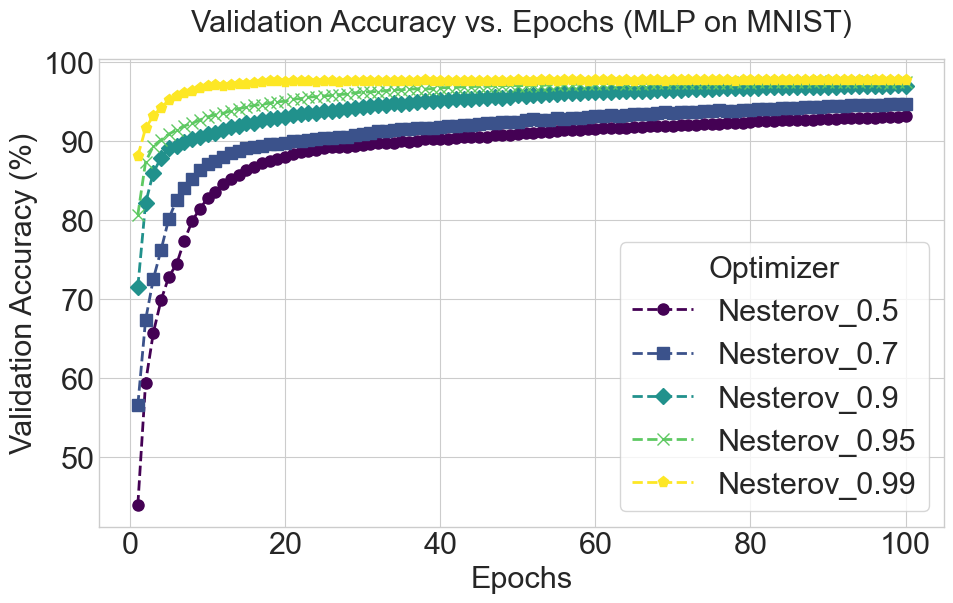

PLOT SAVE IN: Analysis_6_Nesterov_Momentum\Analysis_6_Nesterov_Momentum1_mnist_mlp_validation_accuracy.png

--- MANIPULATING TASK: CNN on CIFAR-10 ---


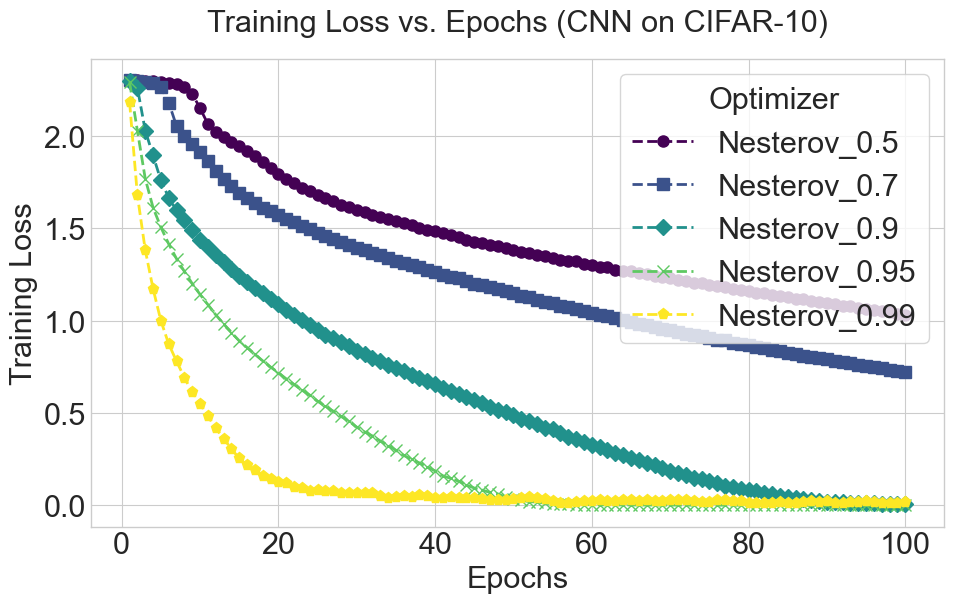

PLOT SAVE IN: Analysis_6_Nesterov_Momentum\Analysis_6_Nesterov_Momentum2_cifar10_cnn_training_loss.png


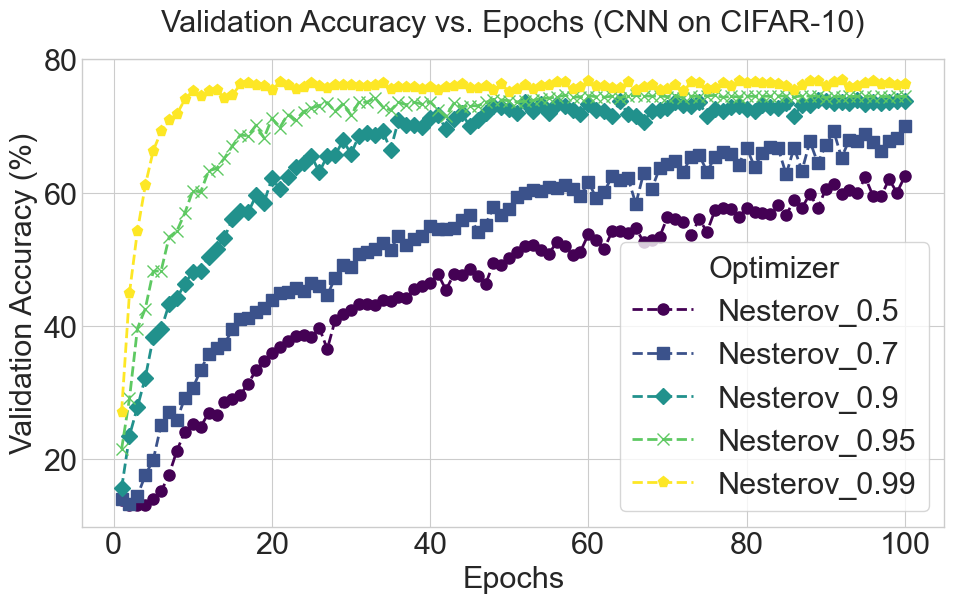

PLOT SAVE IN: Analysis_6_Nesterov_Momentum\Analysis_6_Nesterov_Momentum2_cifar10_cnn_validation_accuracy.png

--- MANIPULATING TASK: VGG13 on CIFAR-10 ---


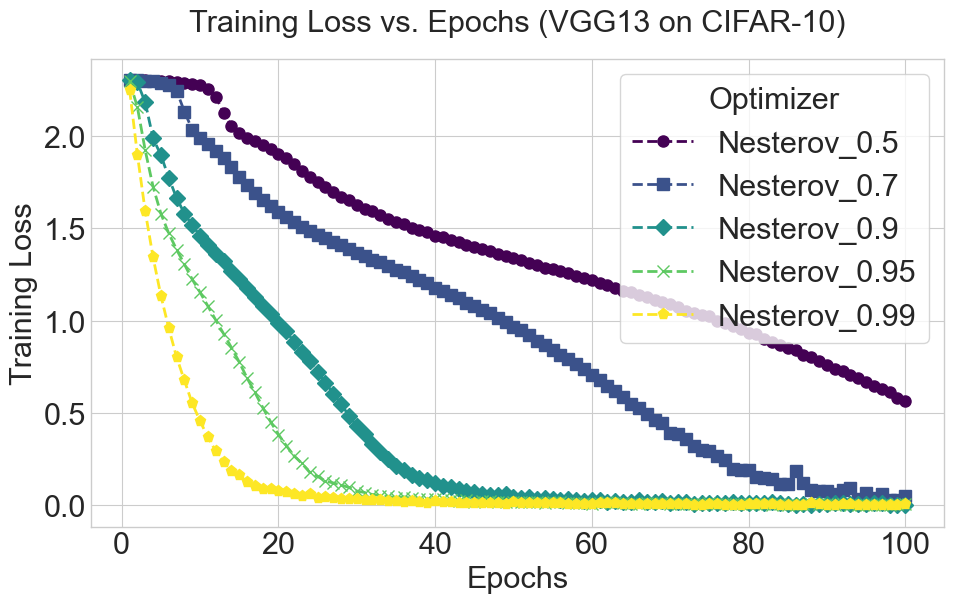

PLOT SAVE IN: Analysis_6_Nesterov_Momentum\Analysis_6_Nesterov_Momentum3_cifar_vgg13_training_loss.png


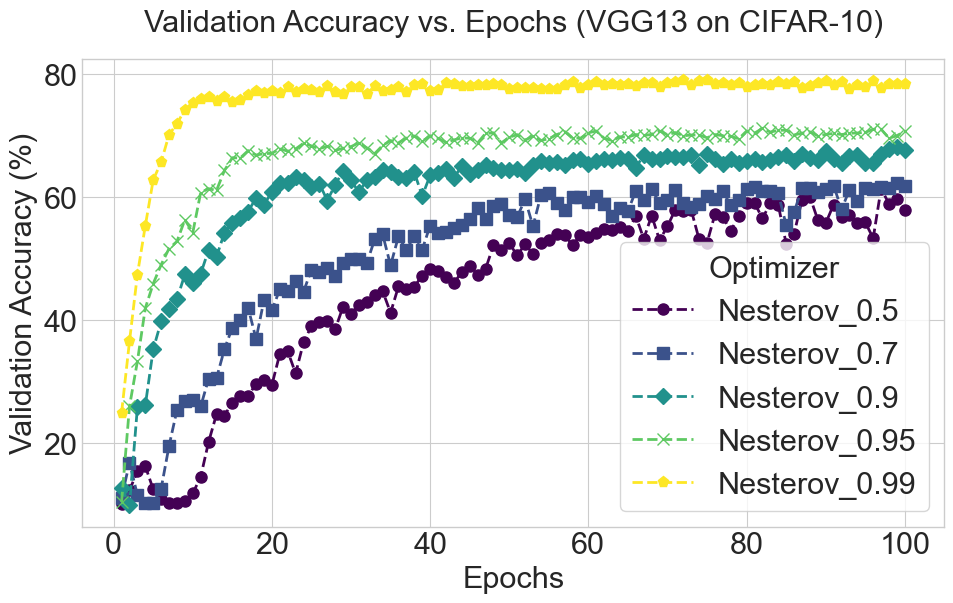

PLOT SAVE IN: Analysis_6_Nesterov_Momentum\Analysis_6_Nesterov_Momentum3_cifar_vgg13_validation_accuracy.png

--- Generating Table for: Final Test Accuracy (Nesterov Study) ---



TABLE SAVED AS HTML: Analysis_6_Nesterov_Momentum\comparison_table.html


In [24]:
# Nesterov Momentum Study

plots_nesterov = Plots()
plots_nesterov.for_momentum_study() 
plots_nesterov.optimizers("Nesterov_0.5", "Nesterov_0.7", "Nesterov_0.9", "Nesterov_0.95", "Nesterov_0.99")
plots_nesterov.output_dir("Analysis_6_Nesterov_Momentum")
plots_nesterov.table_caption("Final Test Accuracy (Nesterov Study)")
plots_nesterov.generate()